In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Pré-processamento dos dados

In [16]:
#Lendo o banco de dados
df = pd.read_csv("Cancer_Data.csv")

#Separando os labels e os valores
data_values = df.iloc[:, 2:-1].values
data_labels = df.iloc[:, 1:2].values


#Normalizando os valores antes de realizar o treino
data = (data_values - np.mean(data_values, axis=0)) / np.std(data_values, axis=0)

# Aplicando o algoritmo de Arvore de decisão combinando diferentes parametros

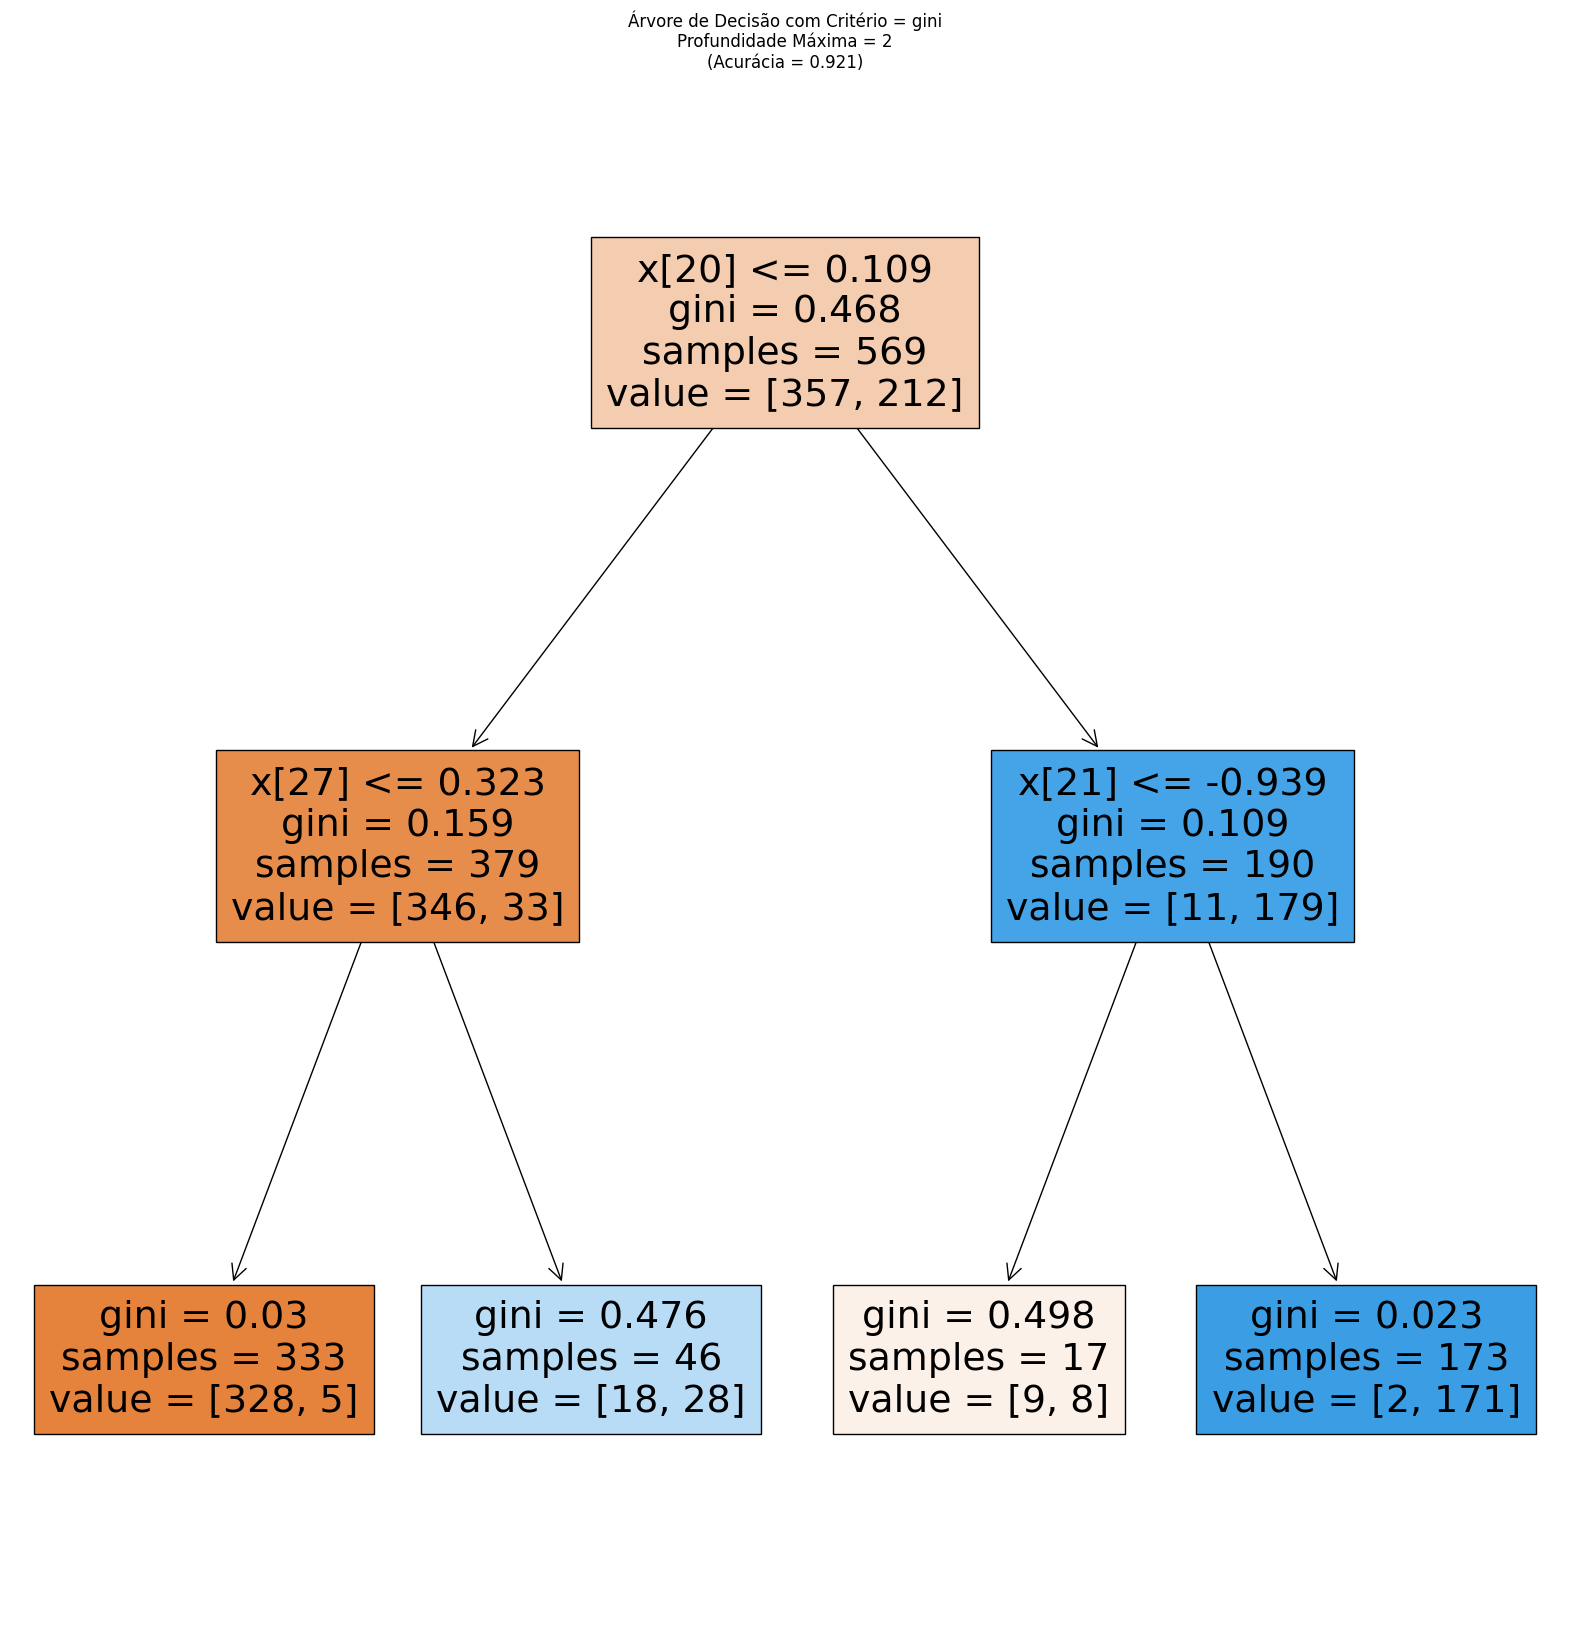

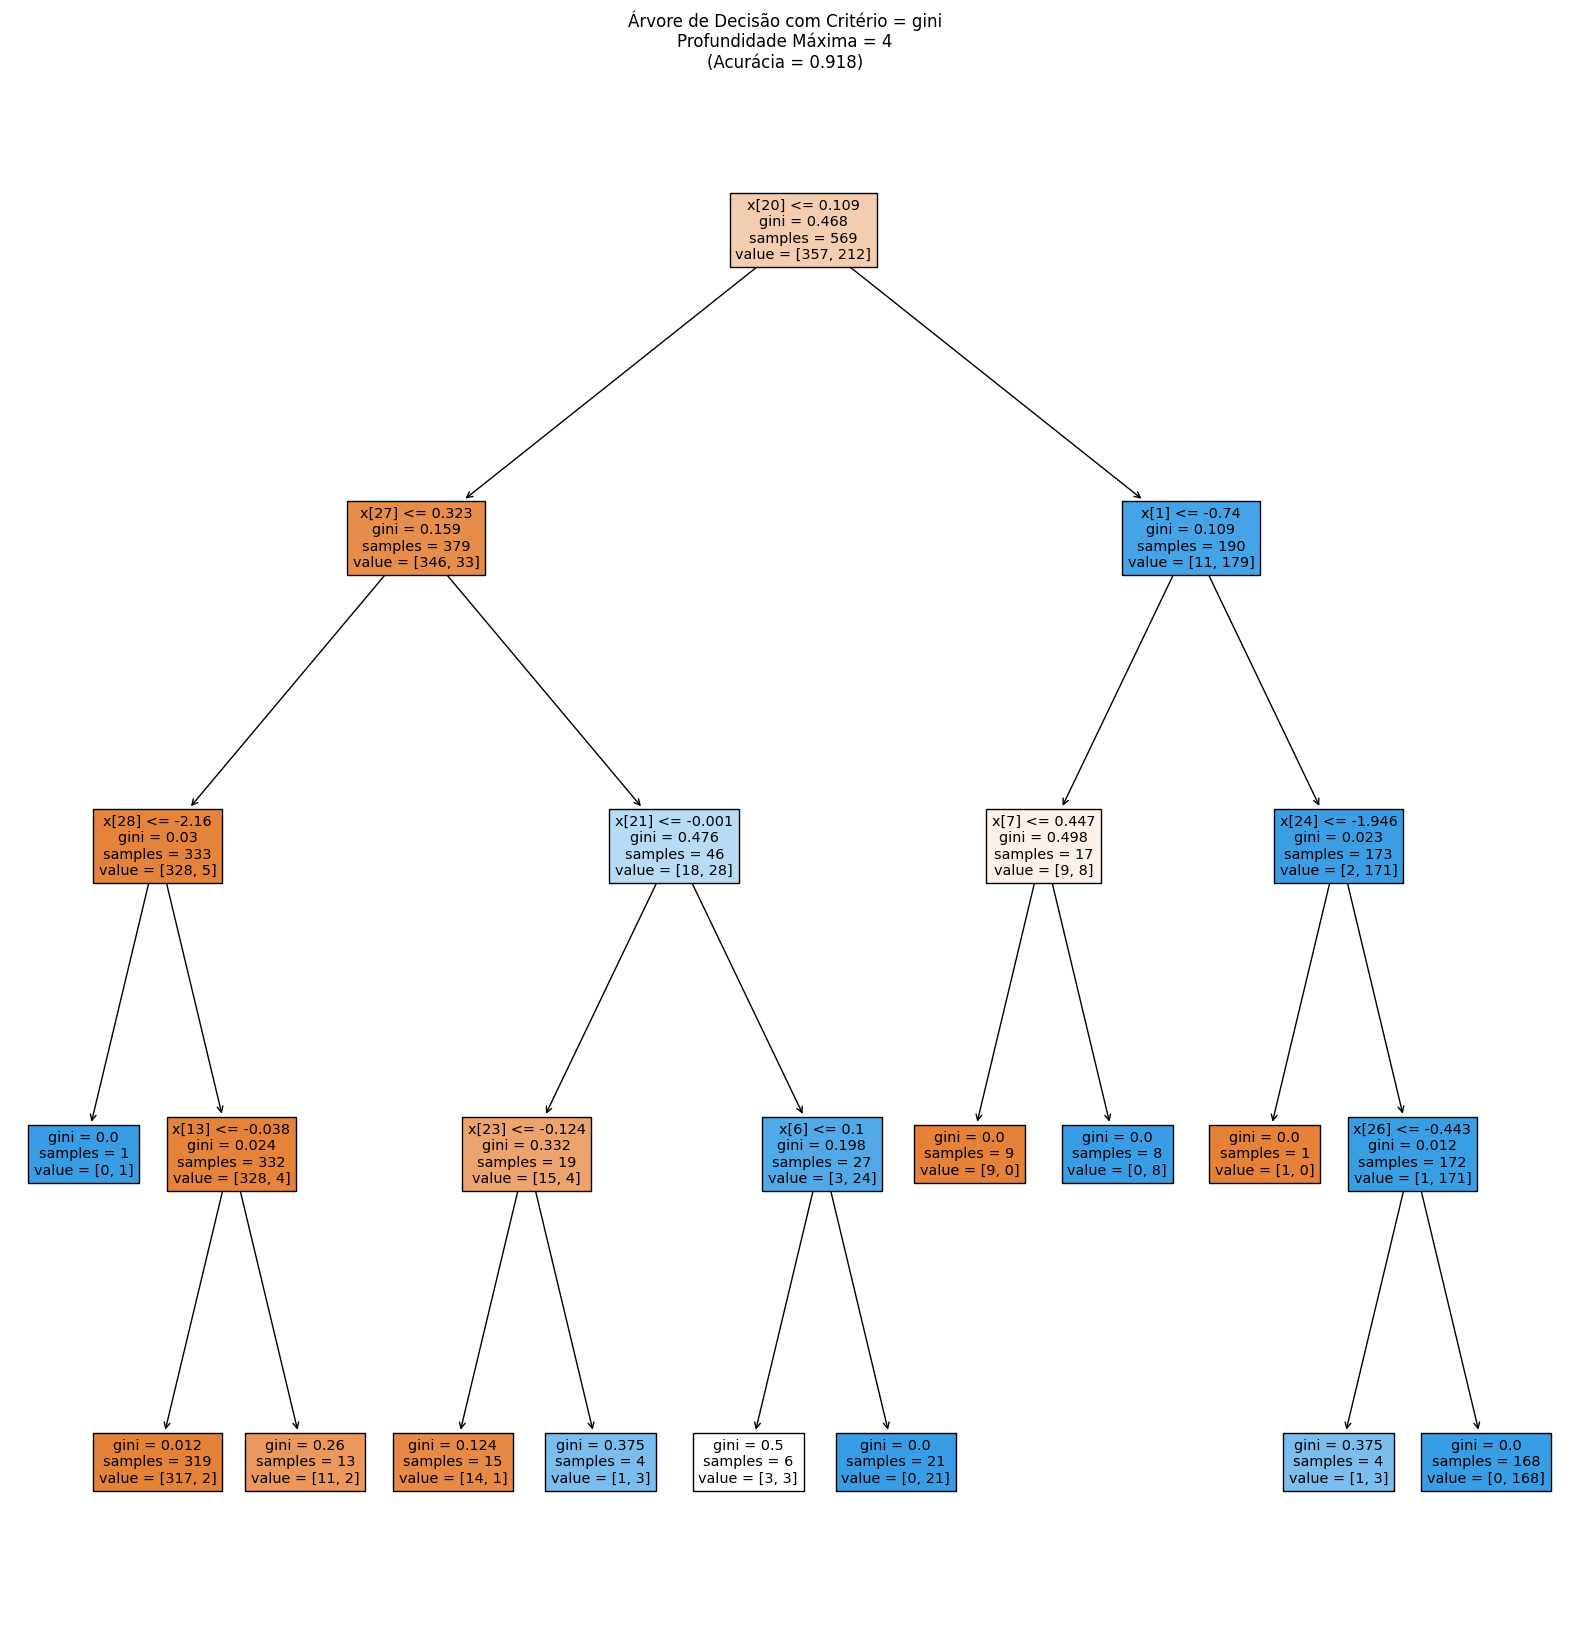

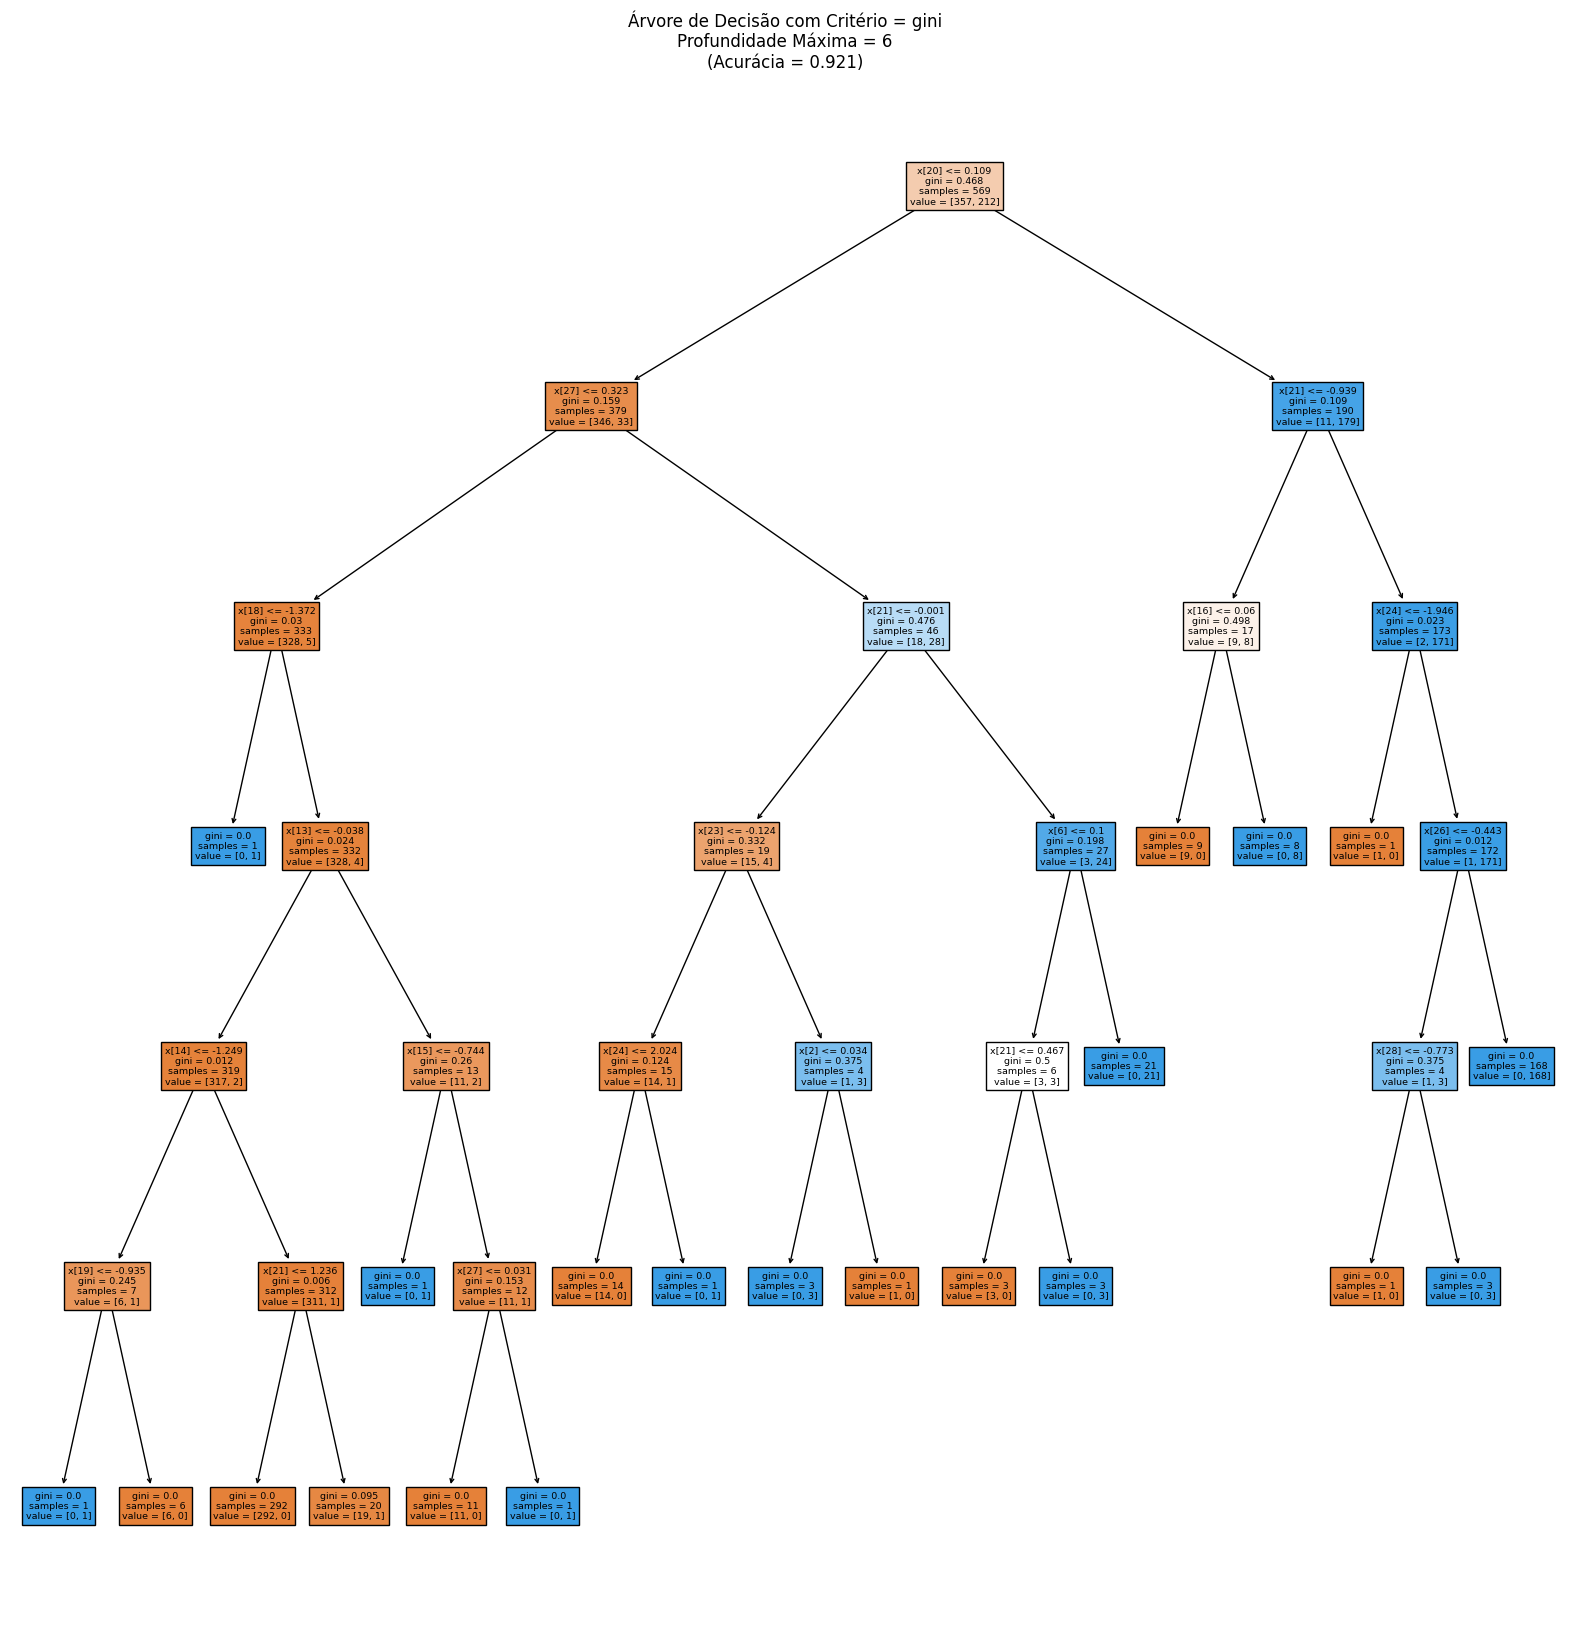

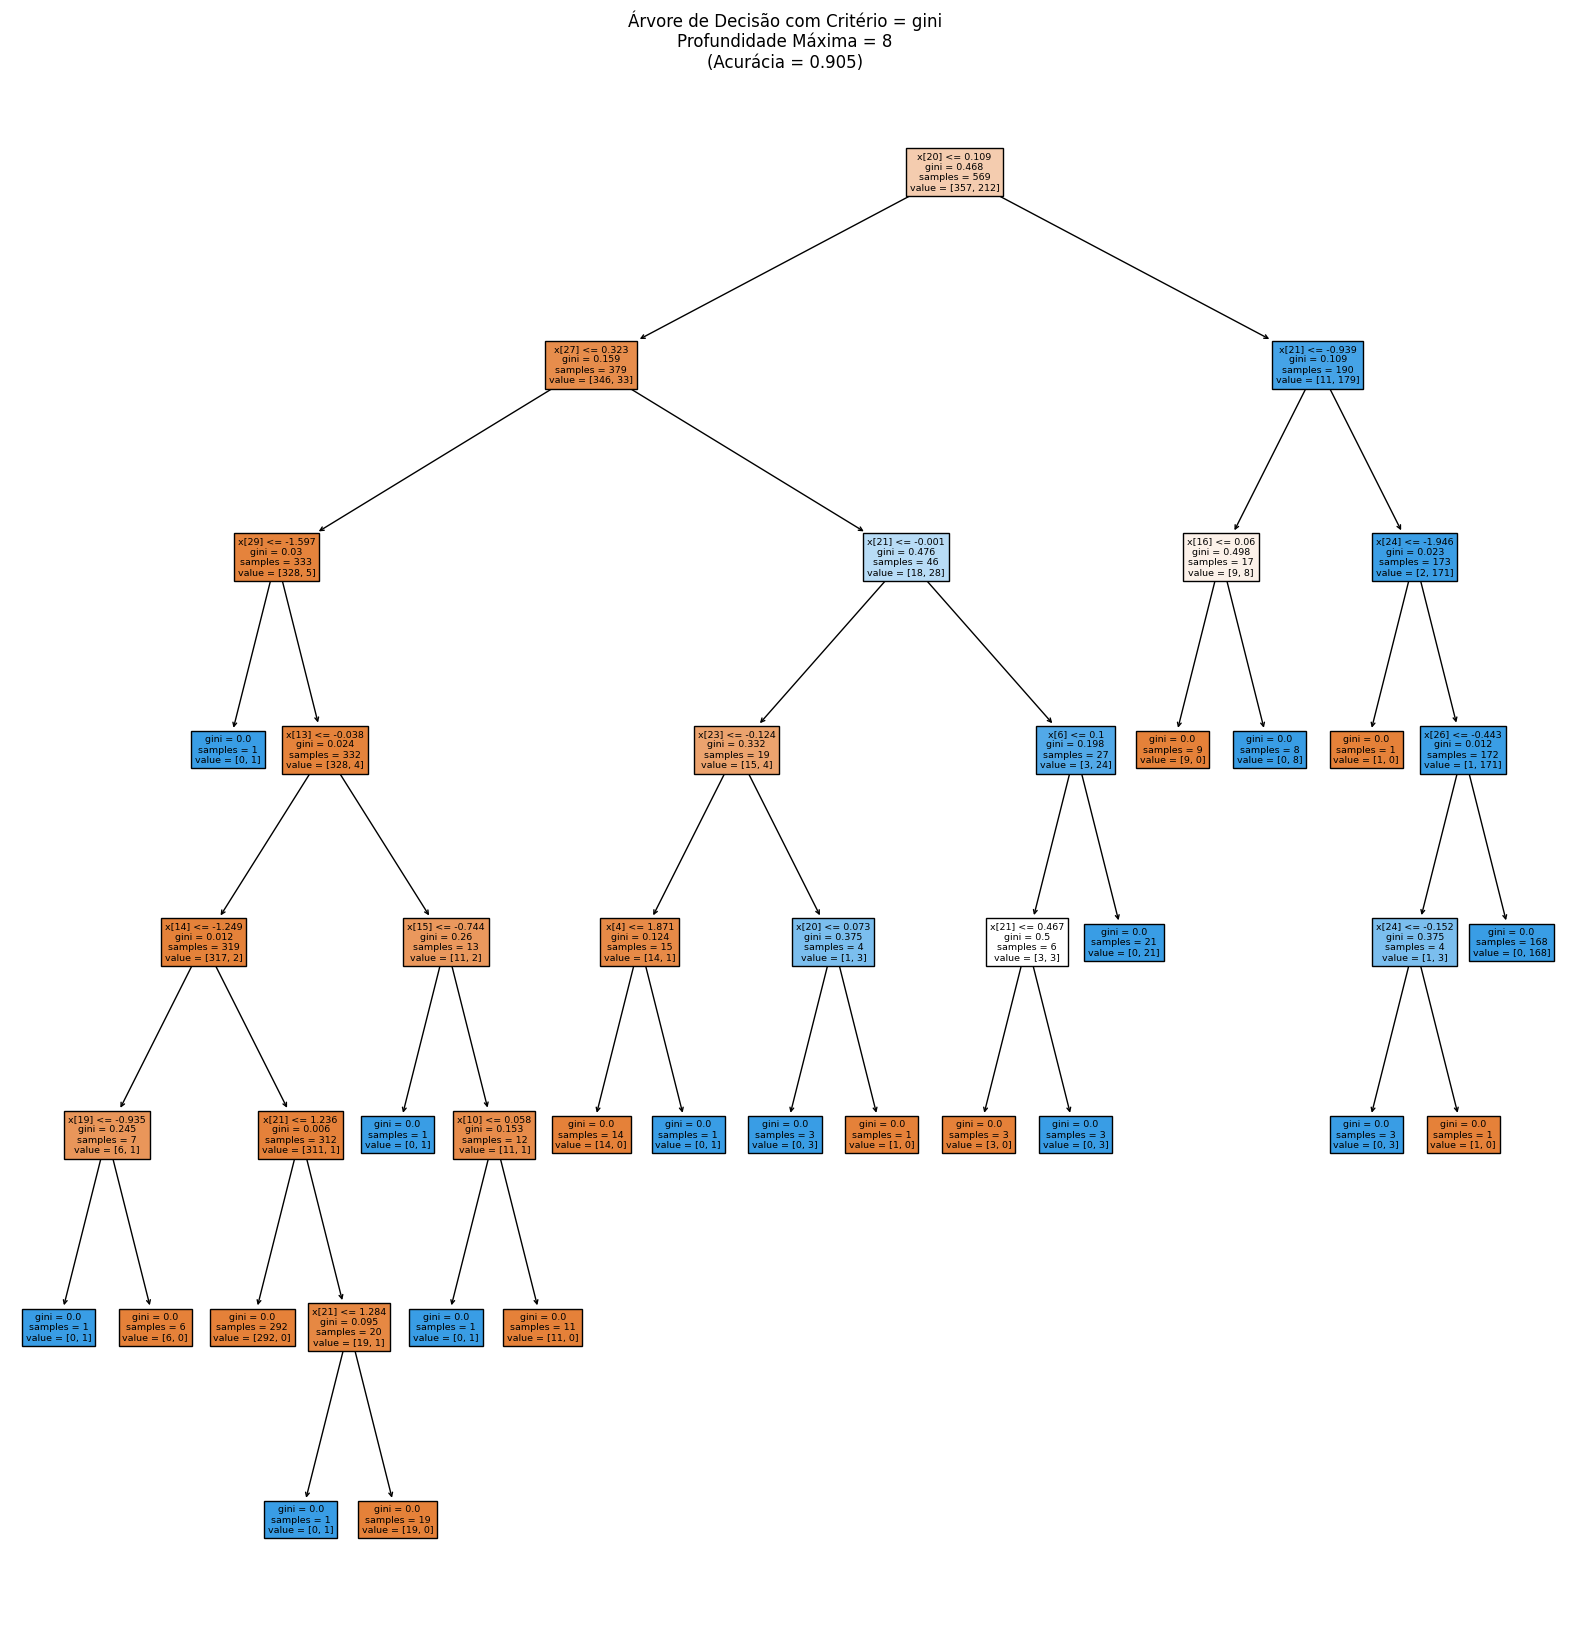

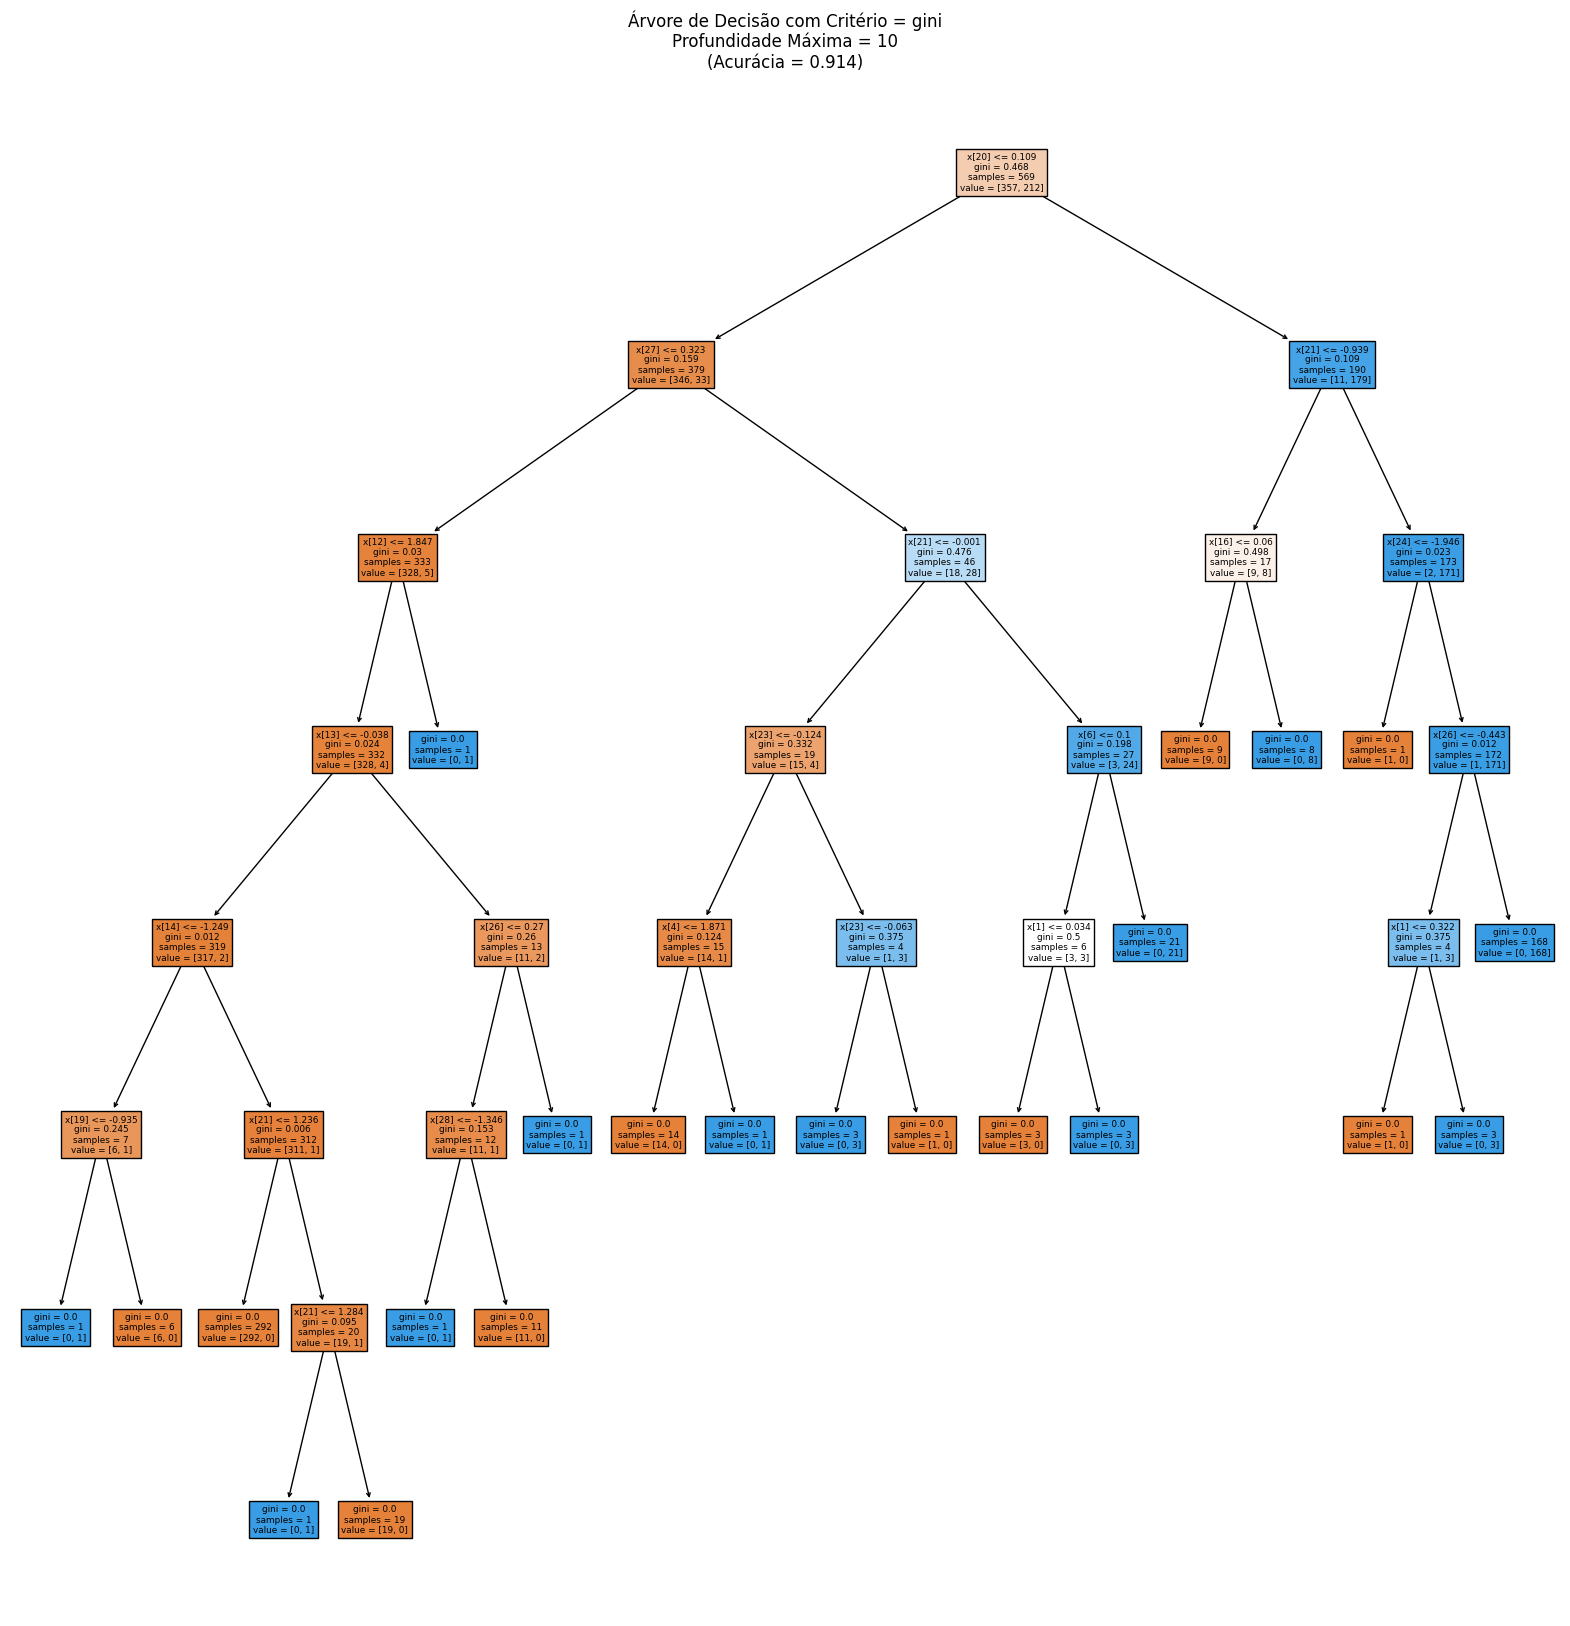

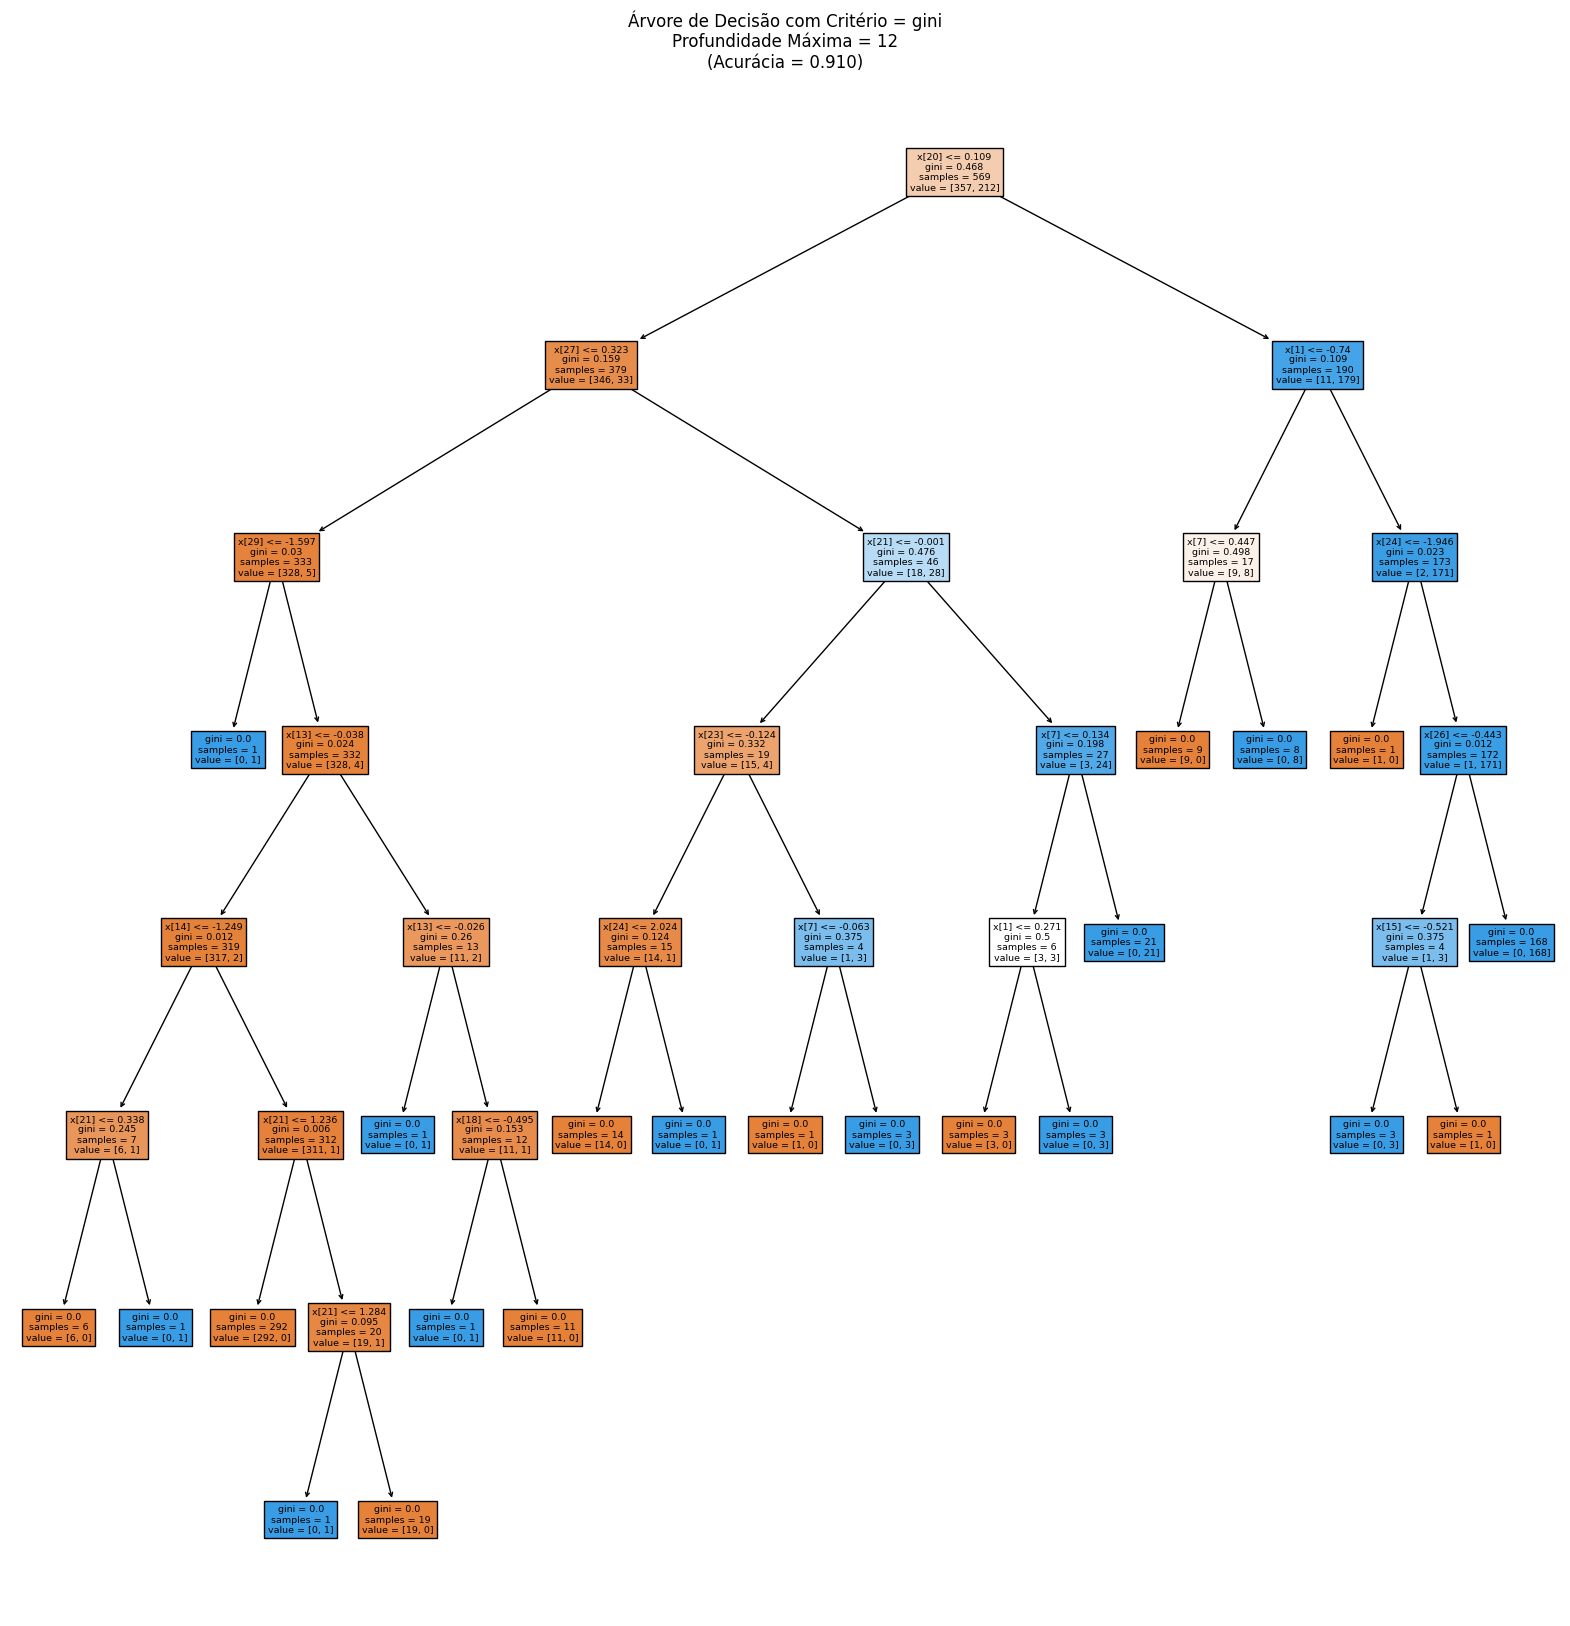

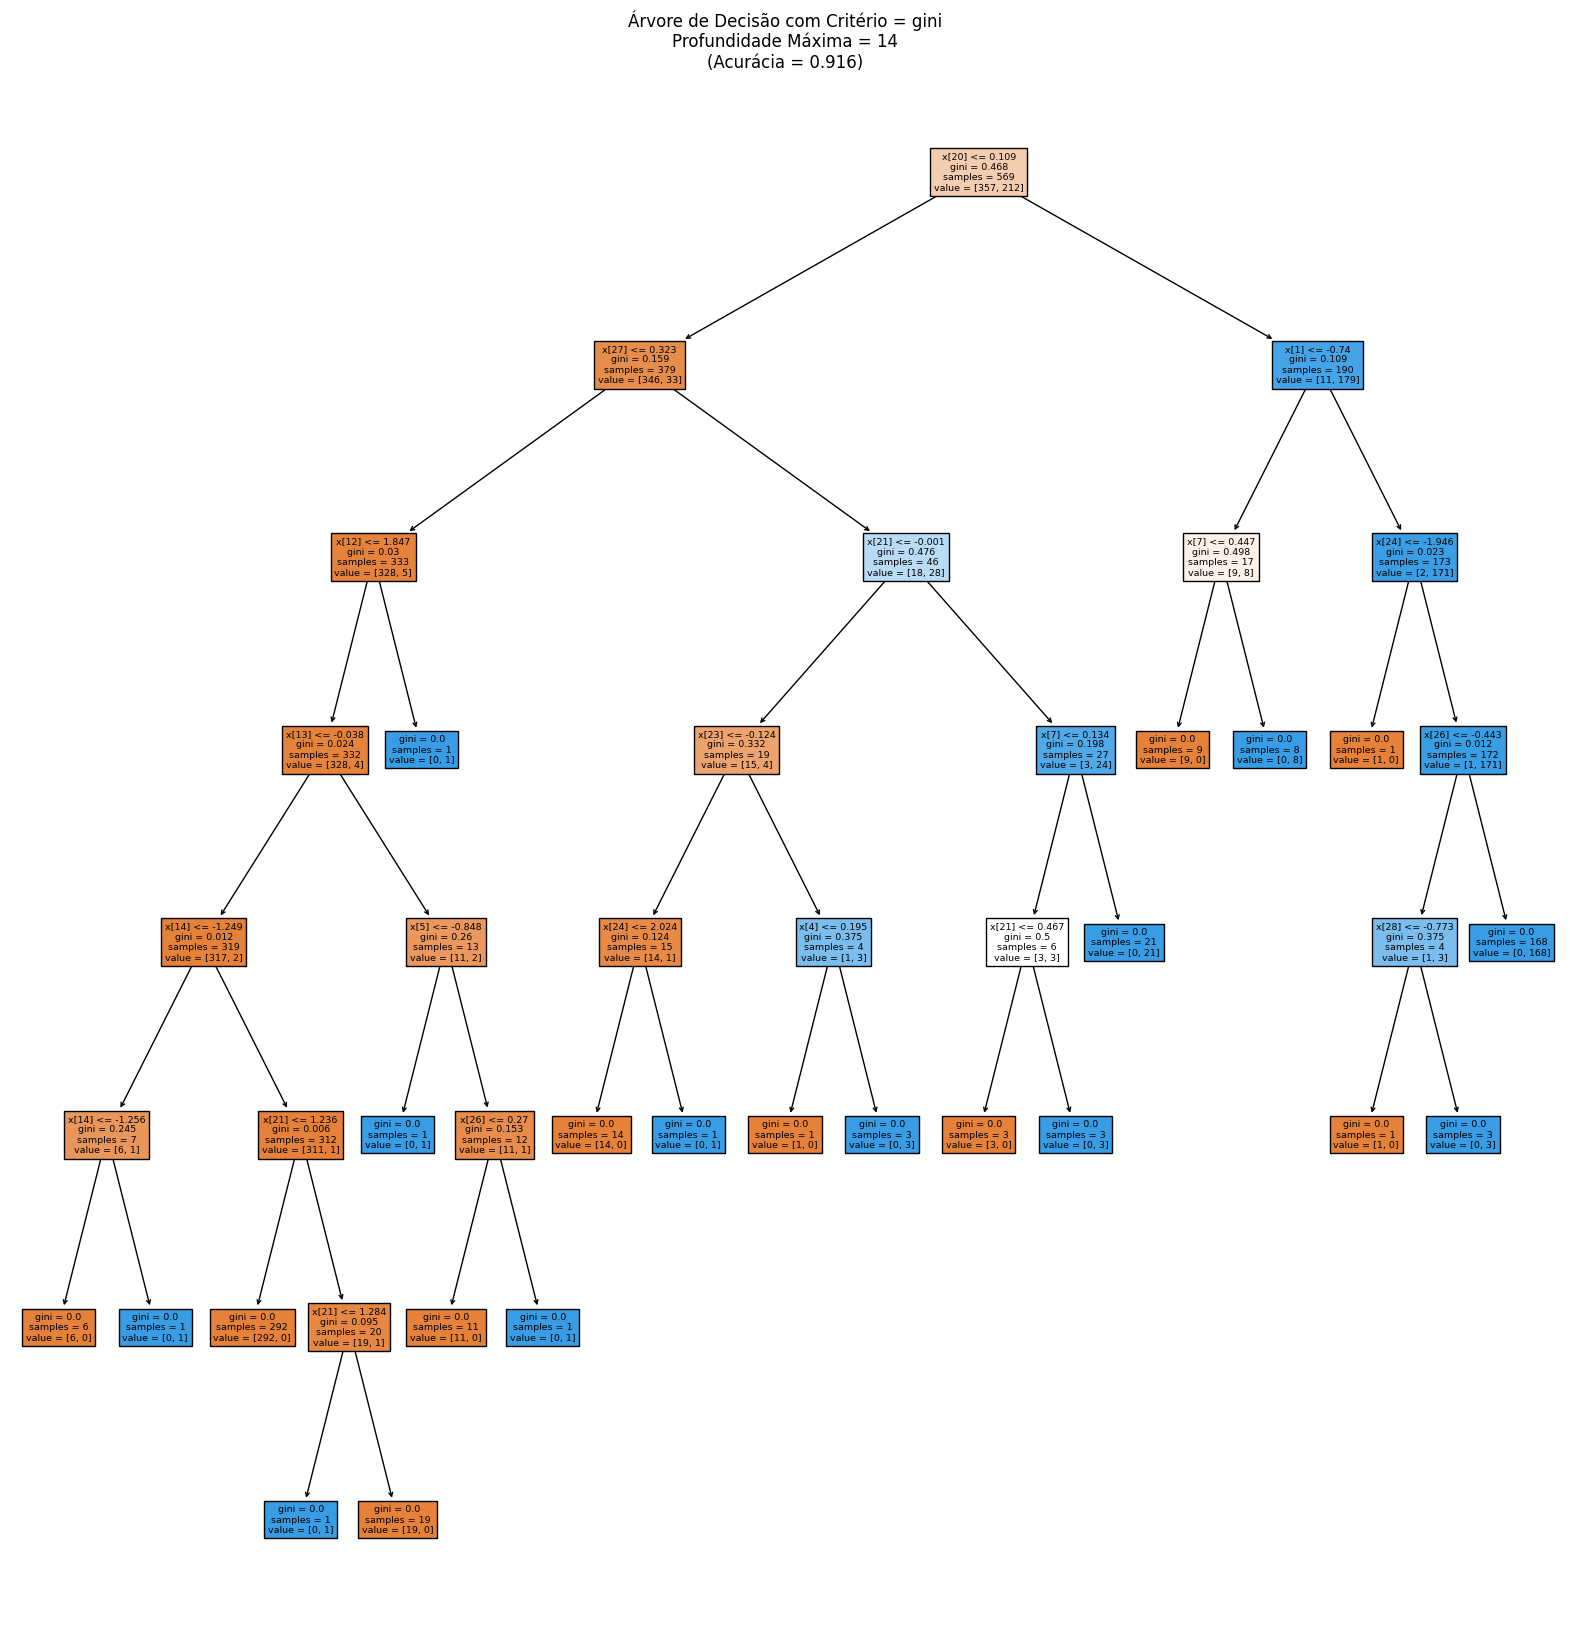

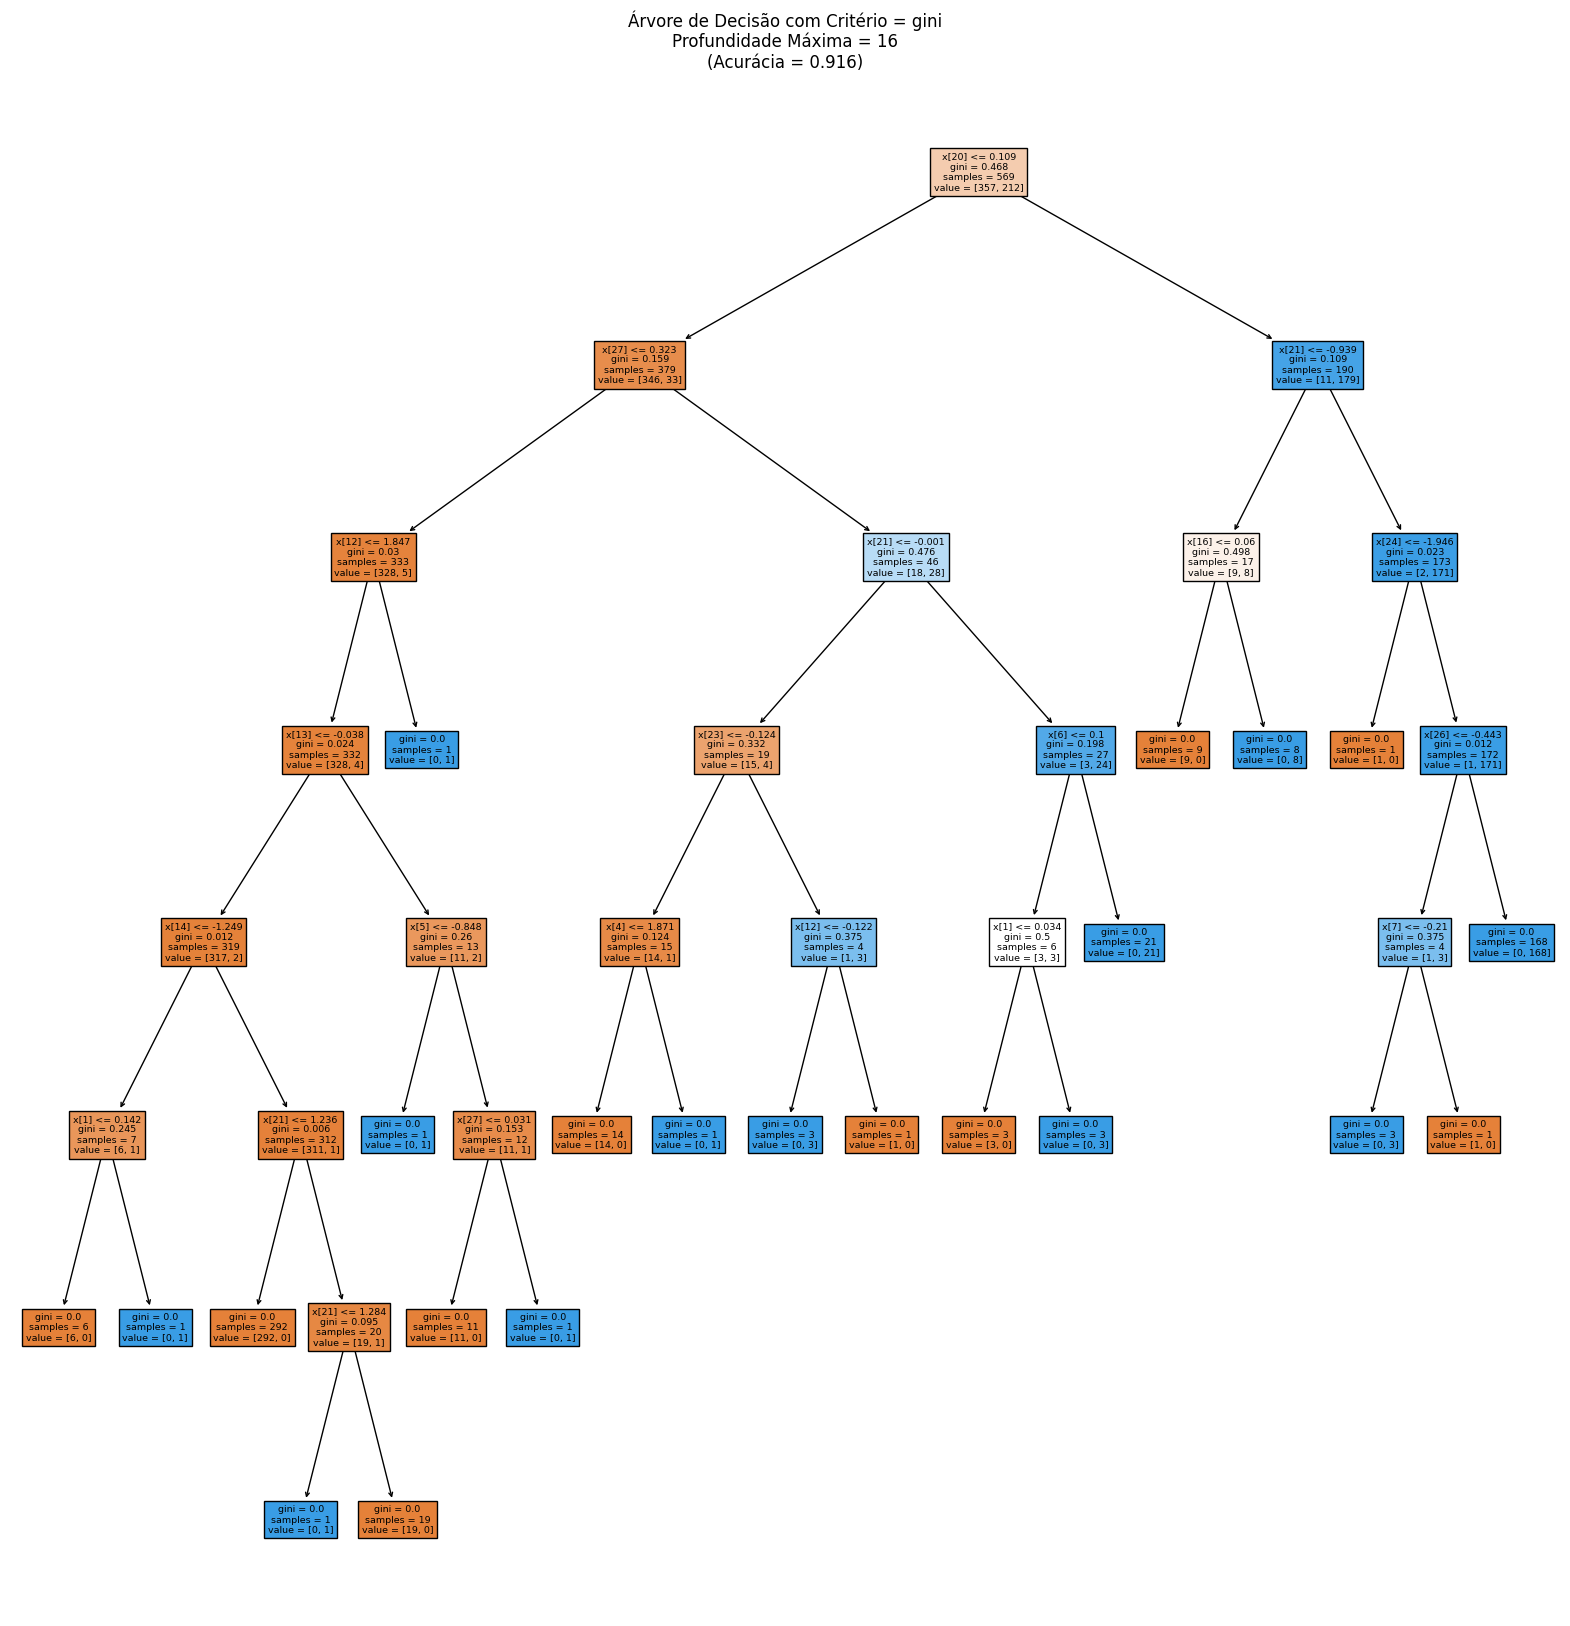

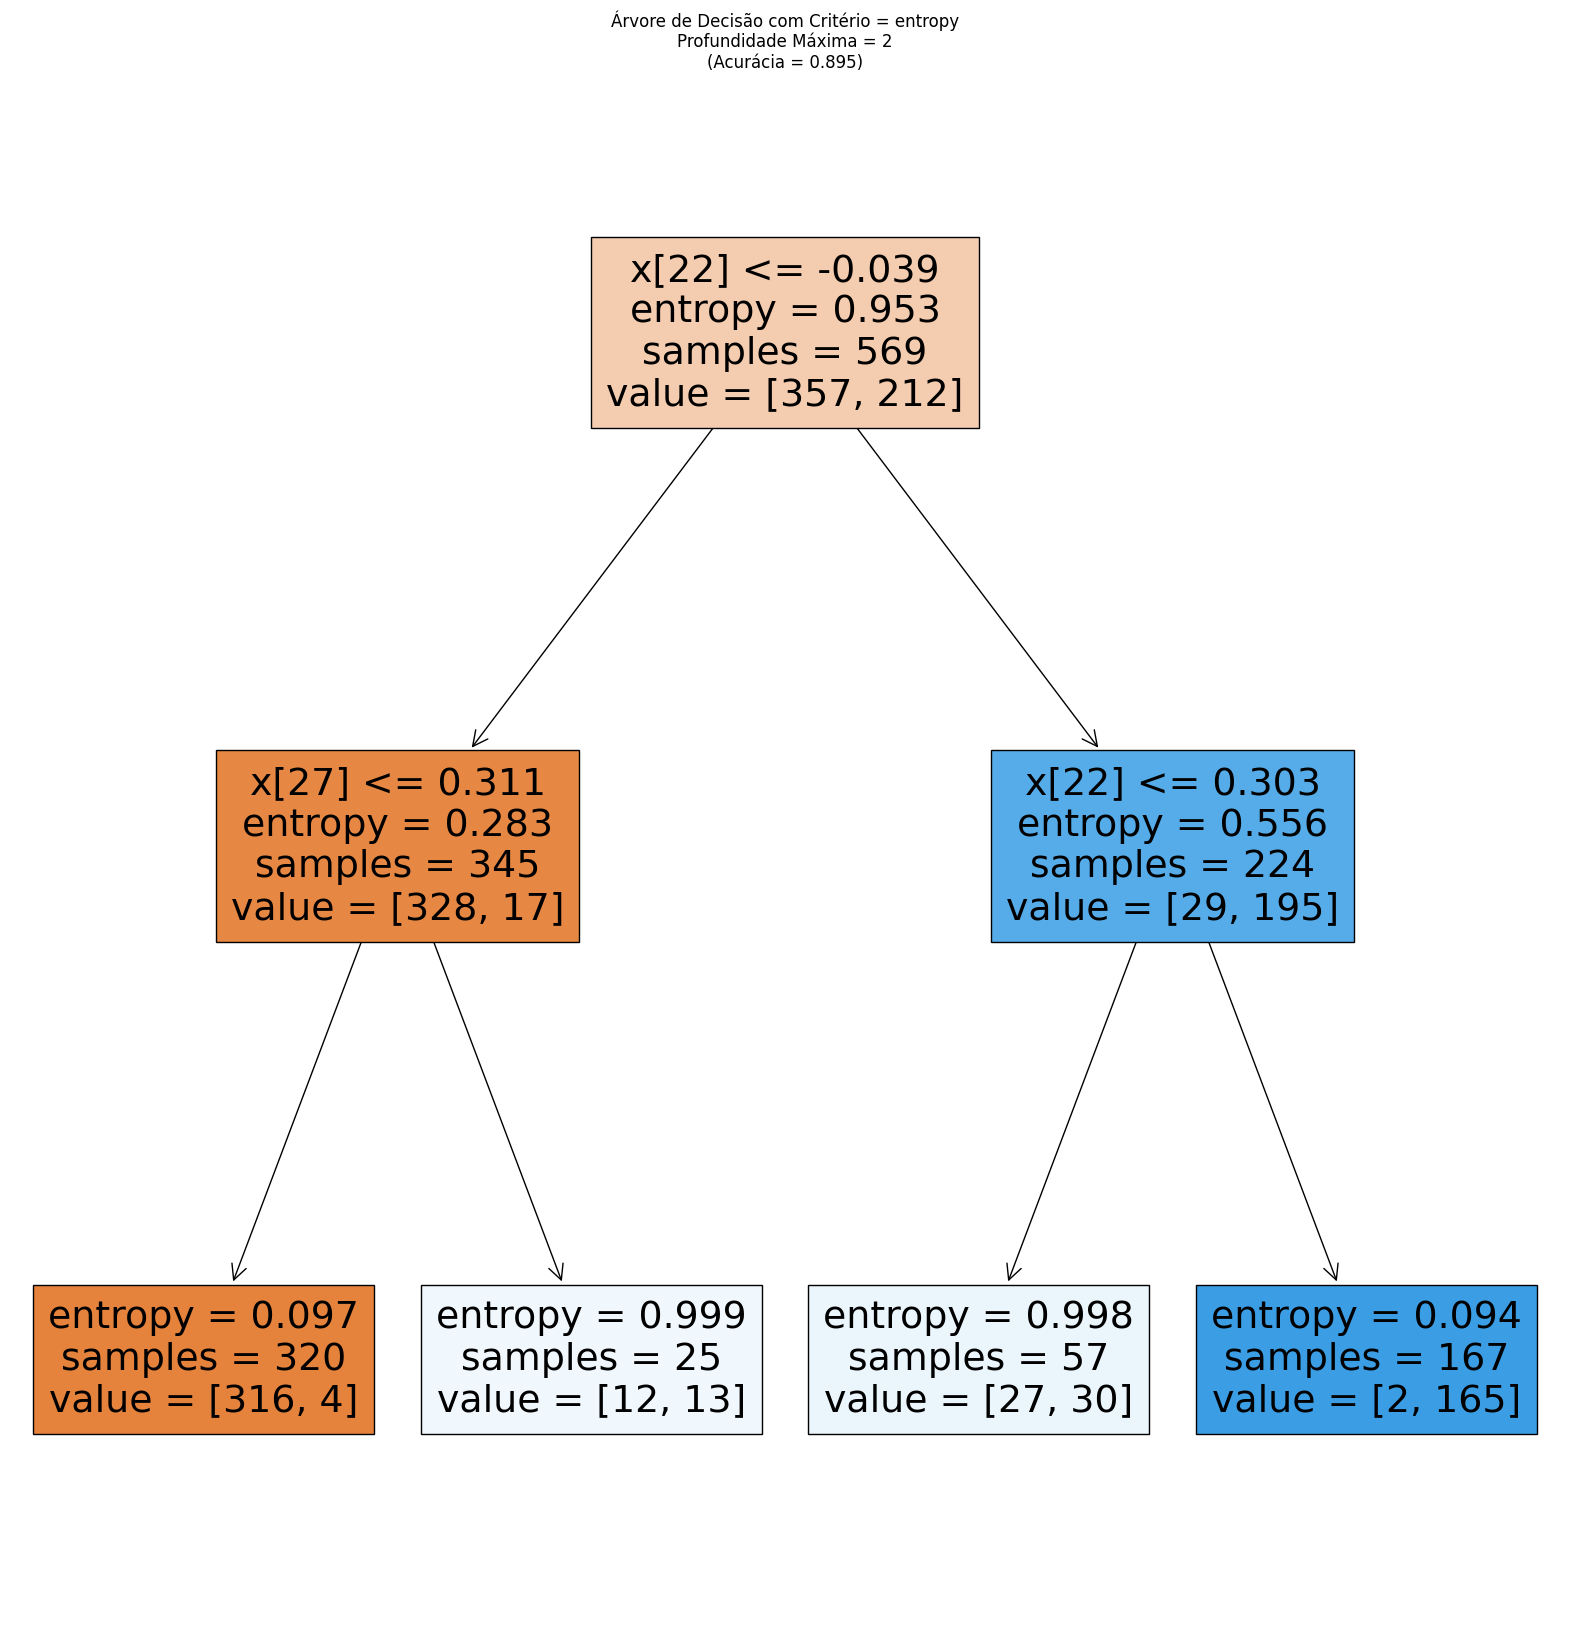

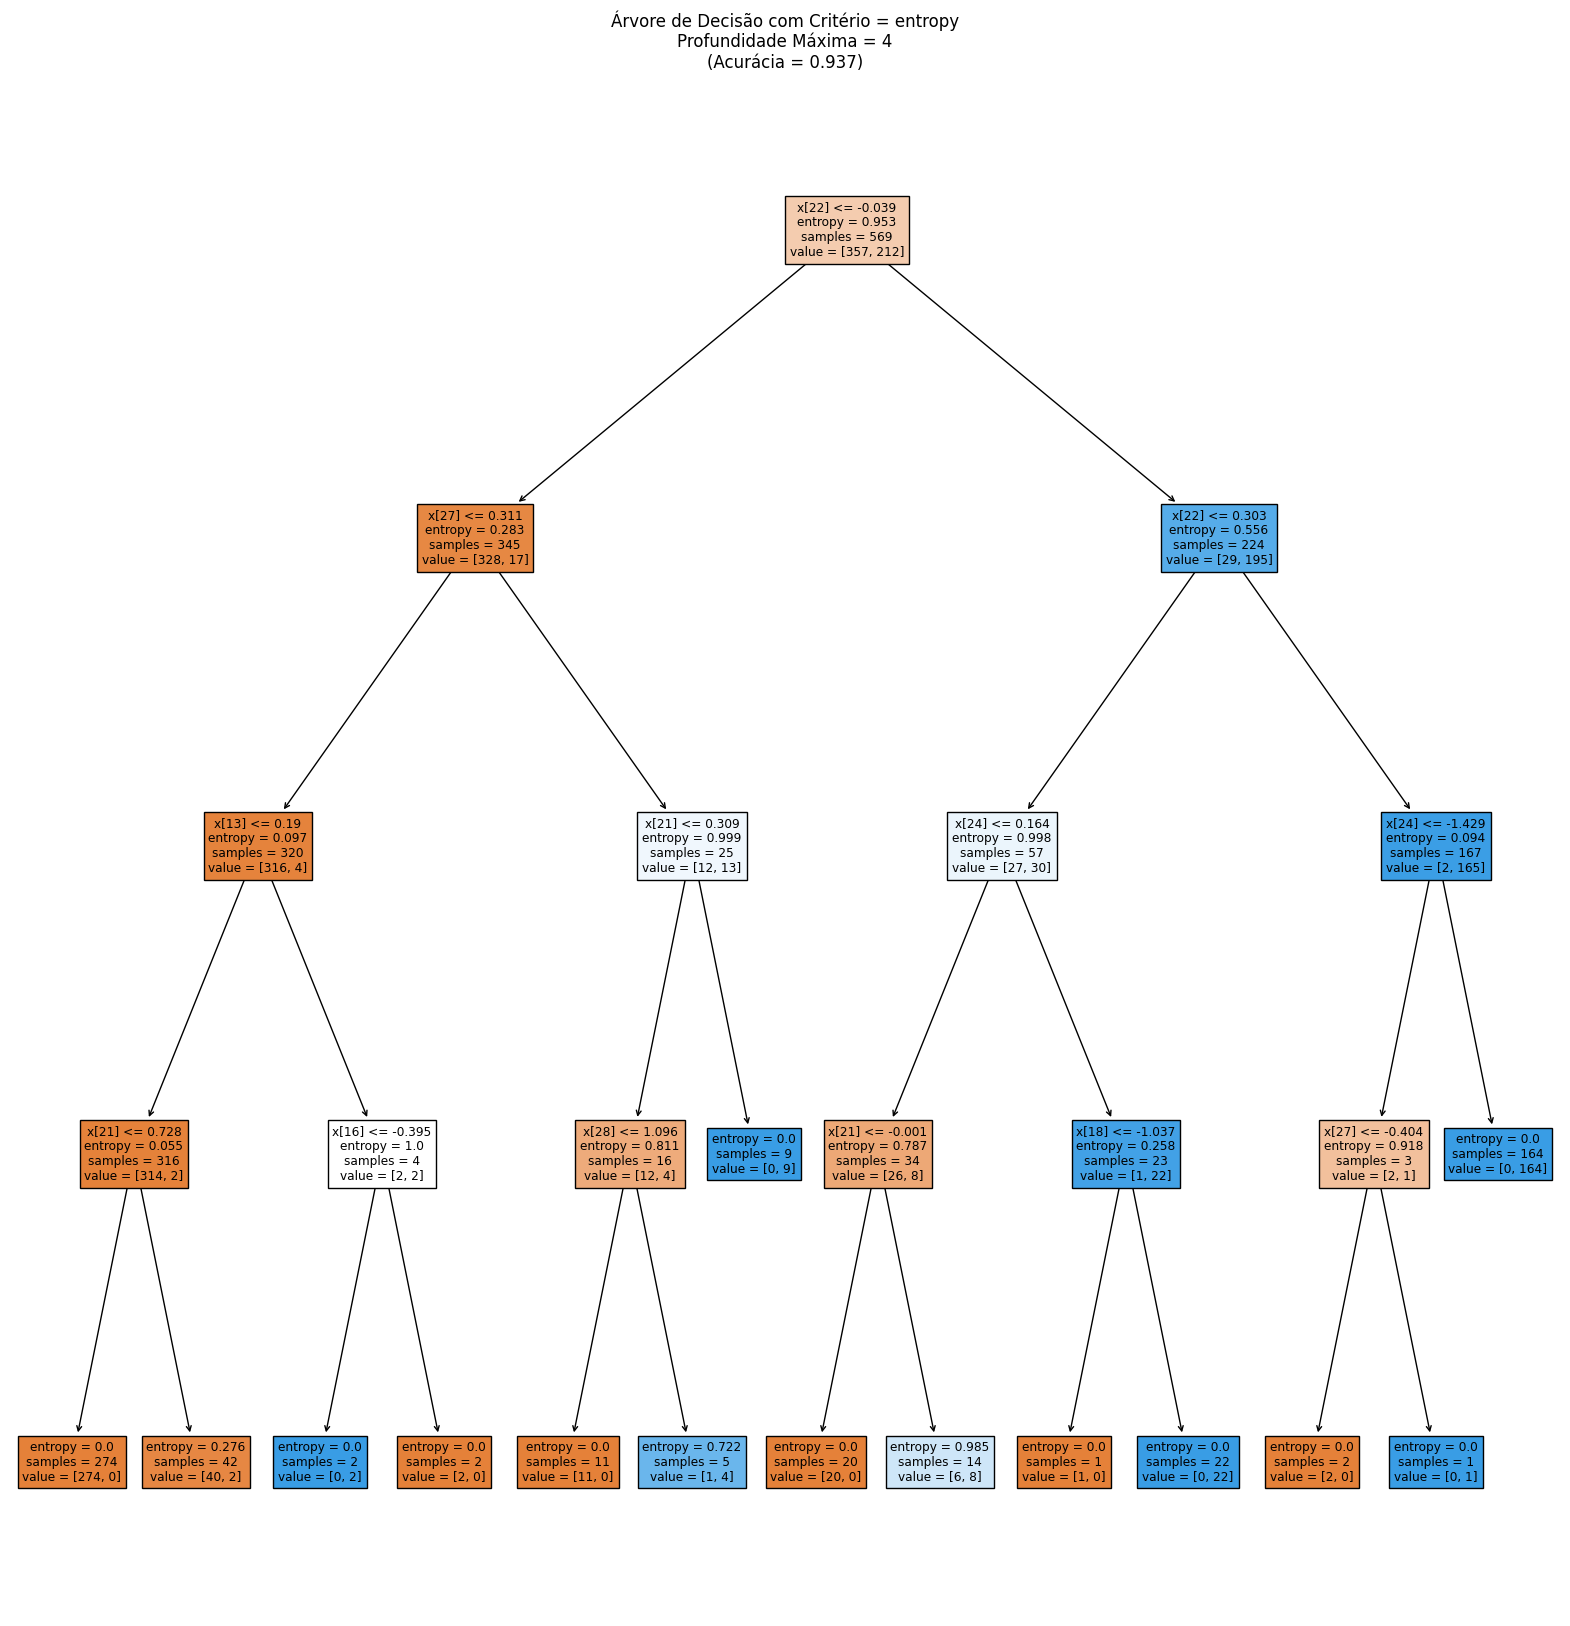

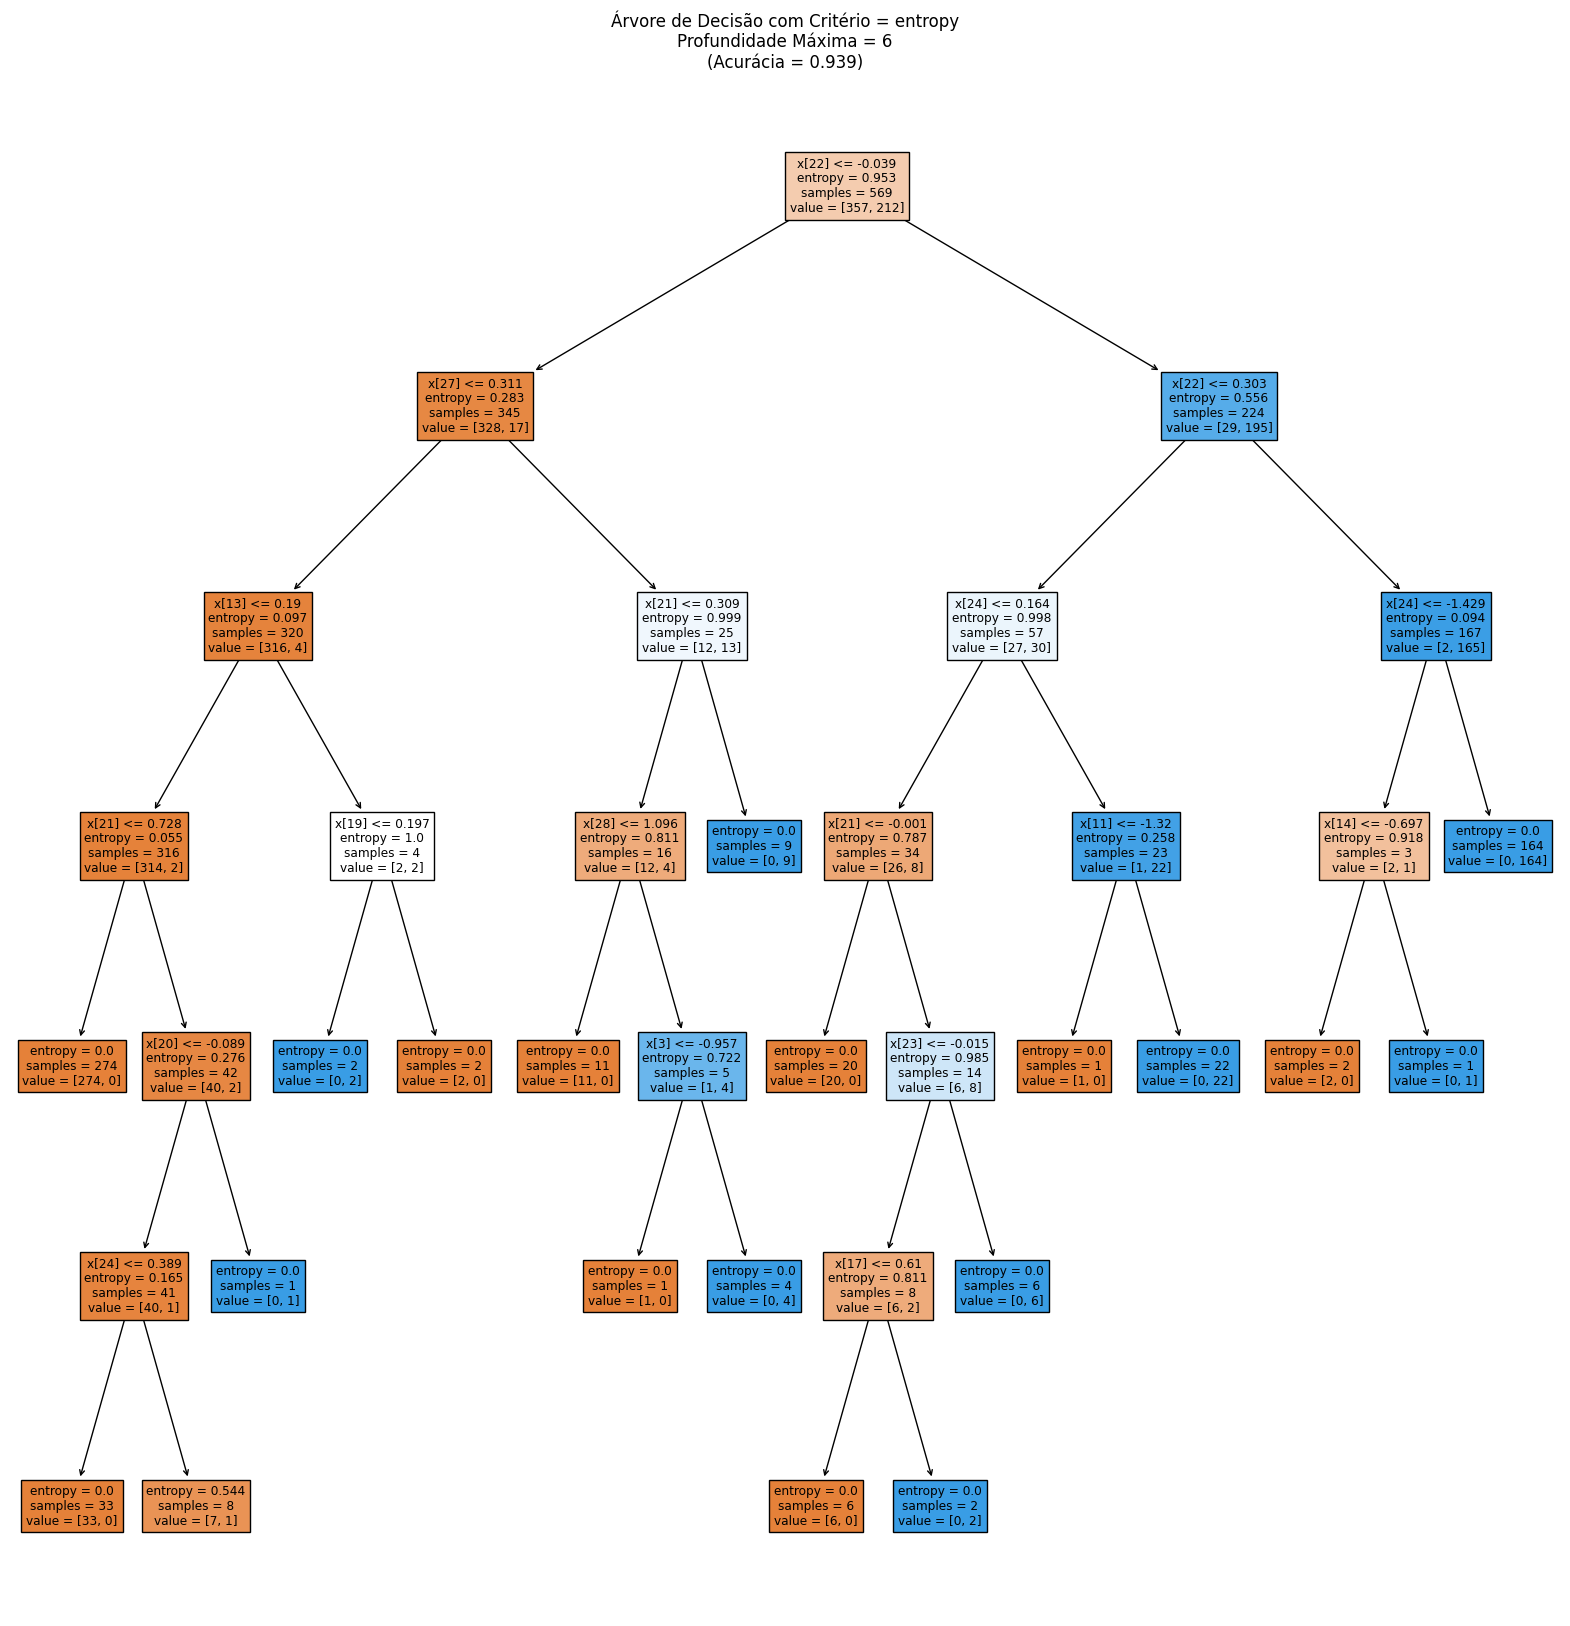

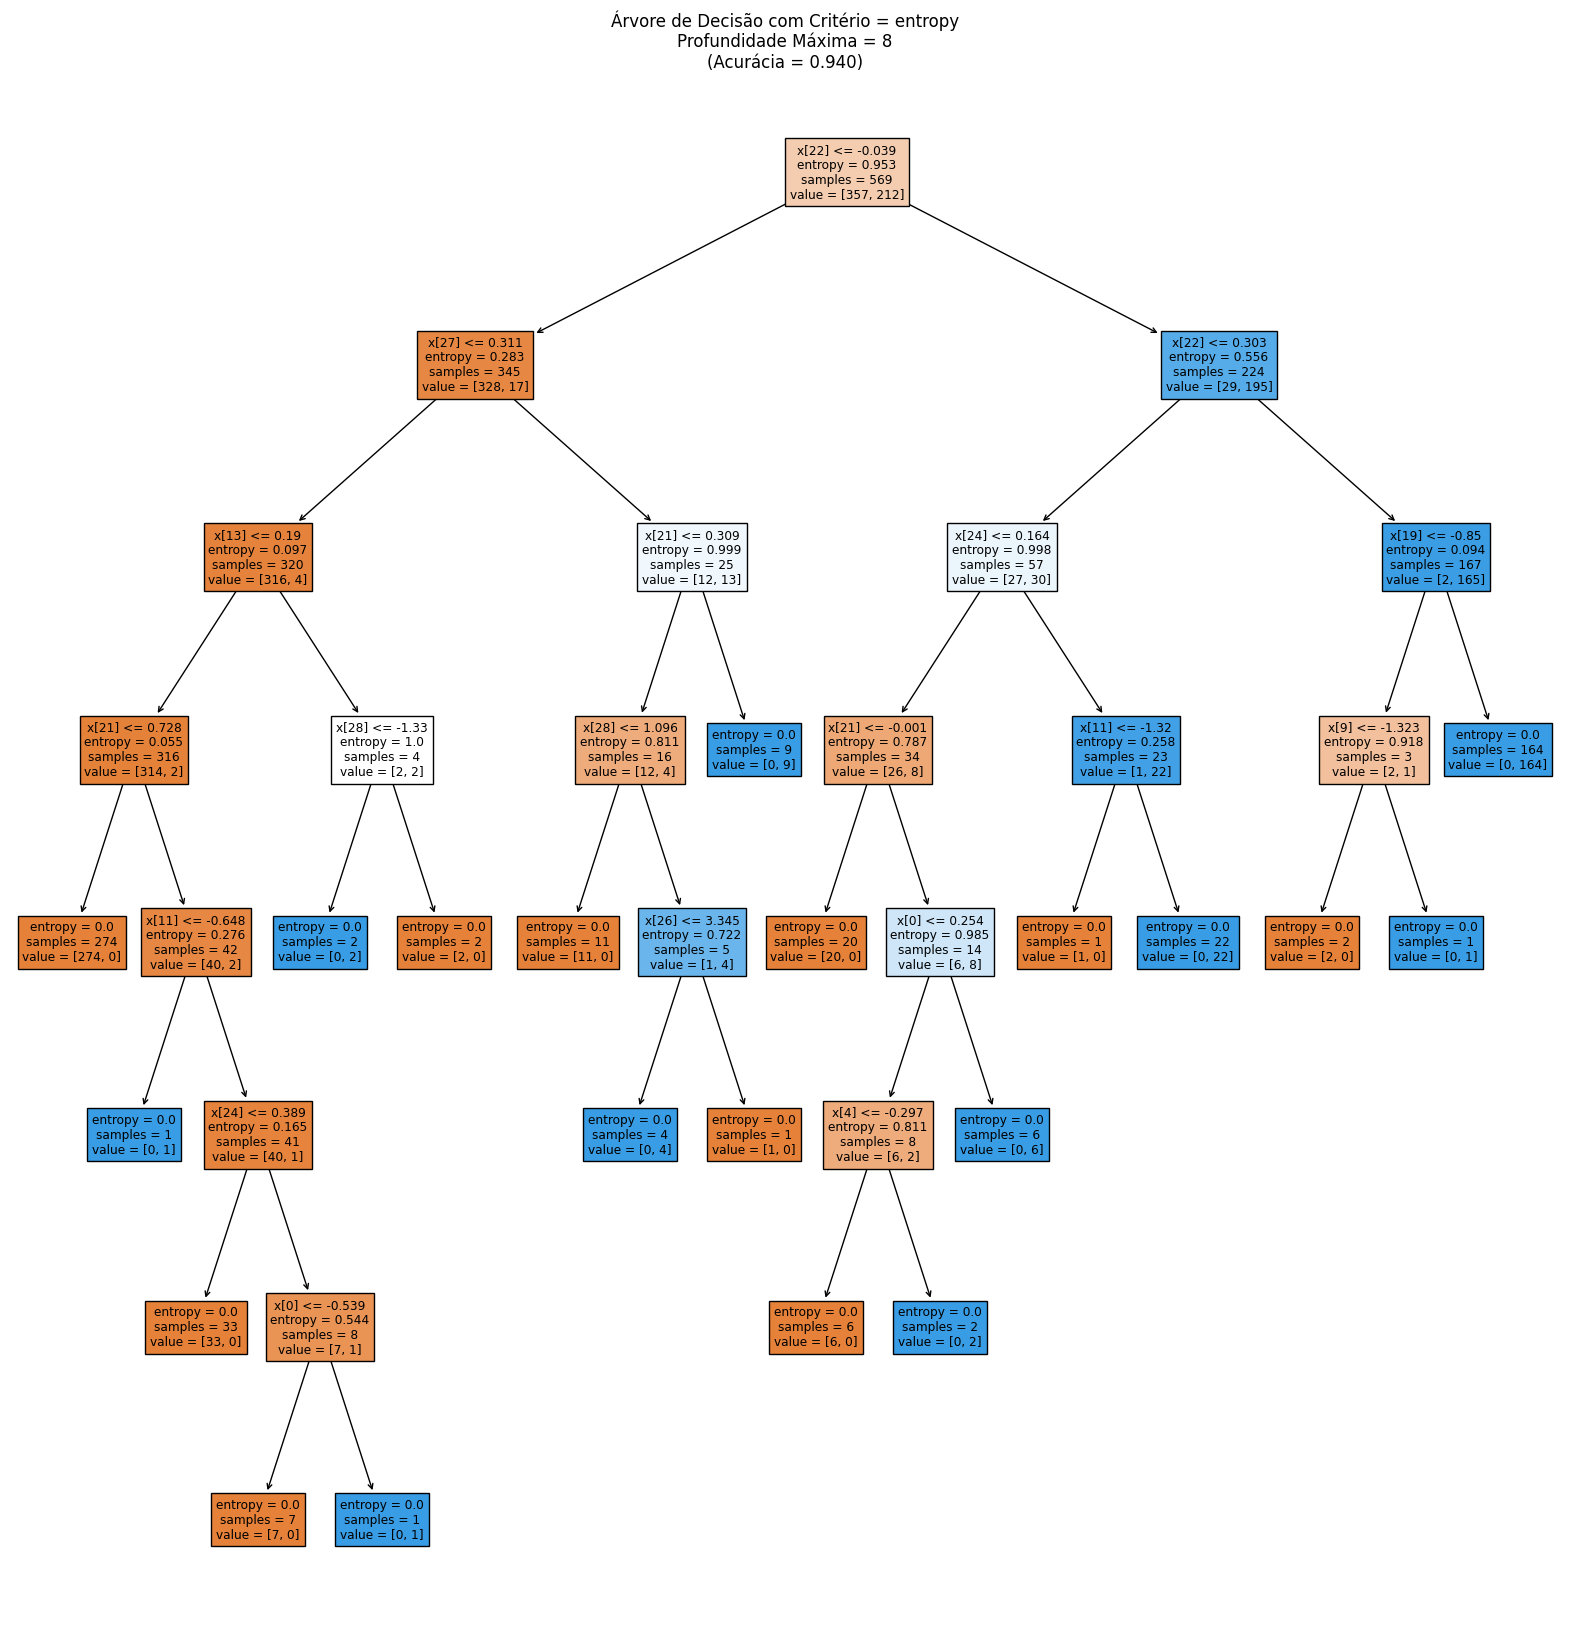

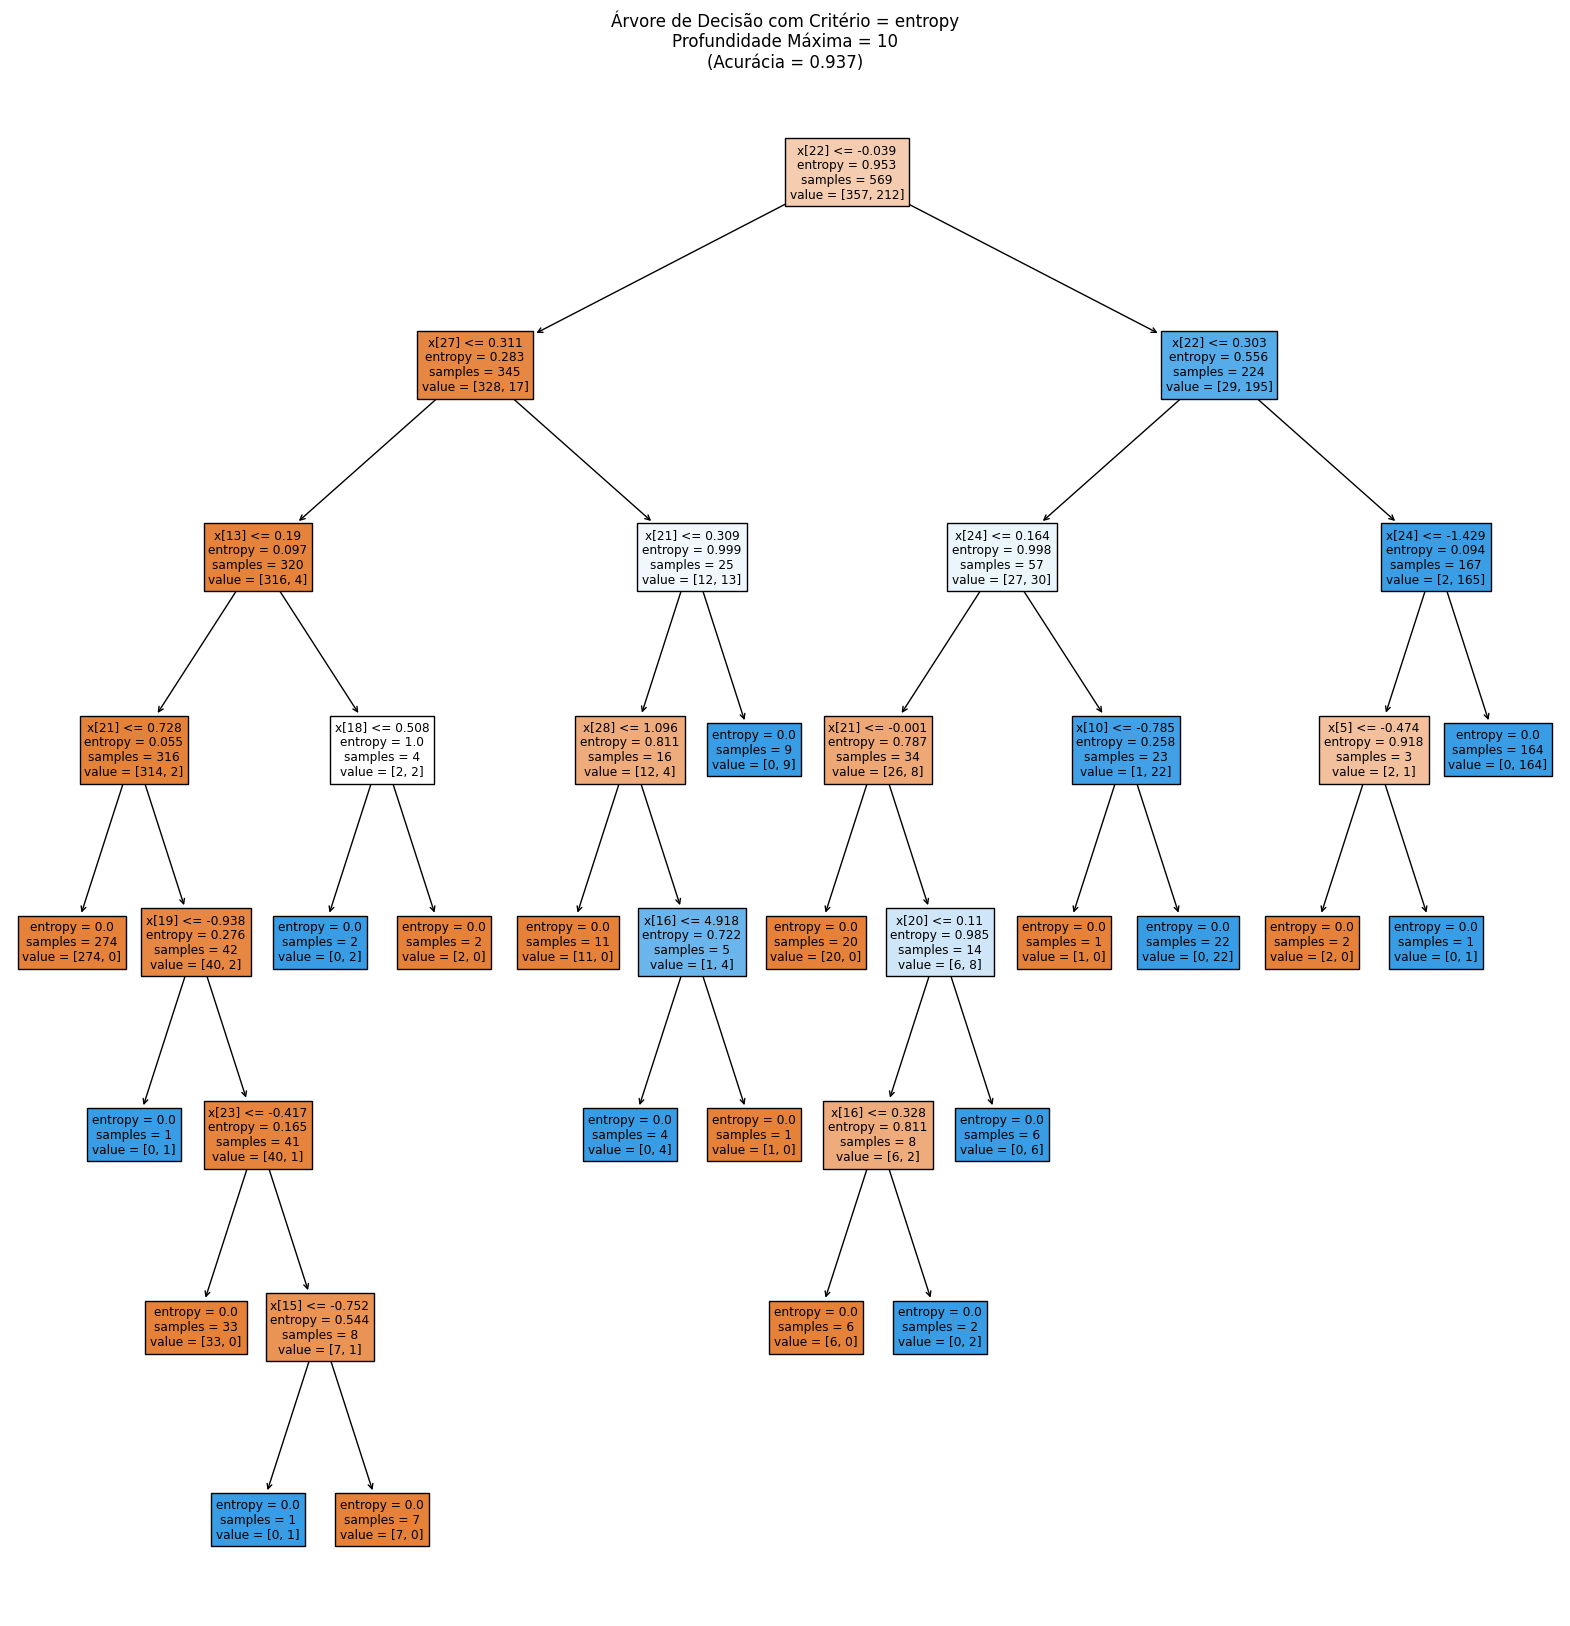

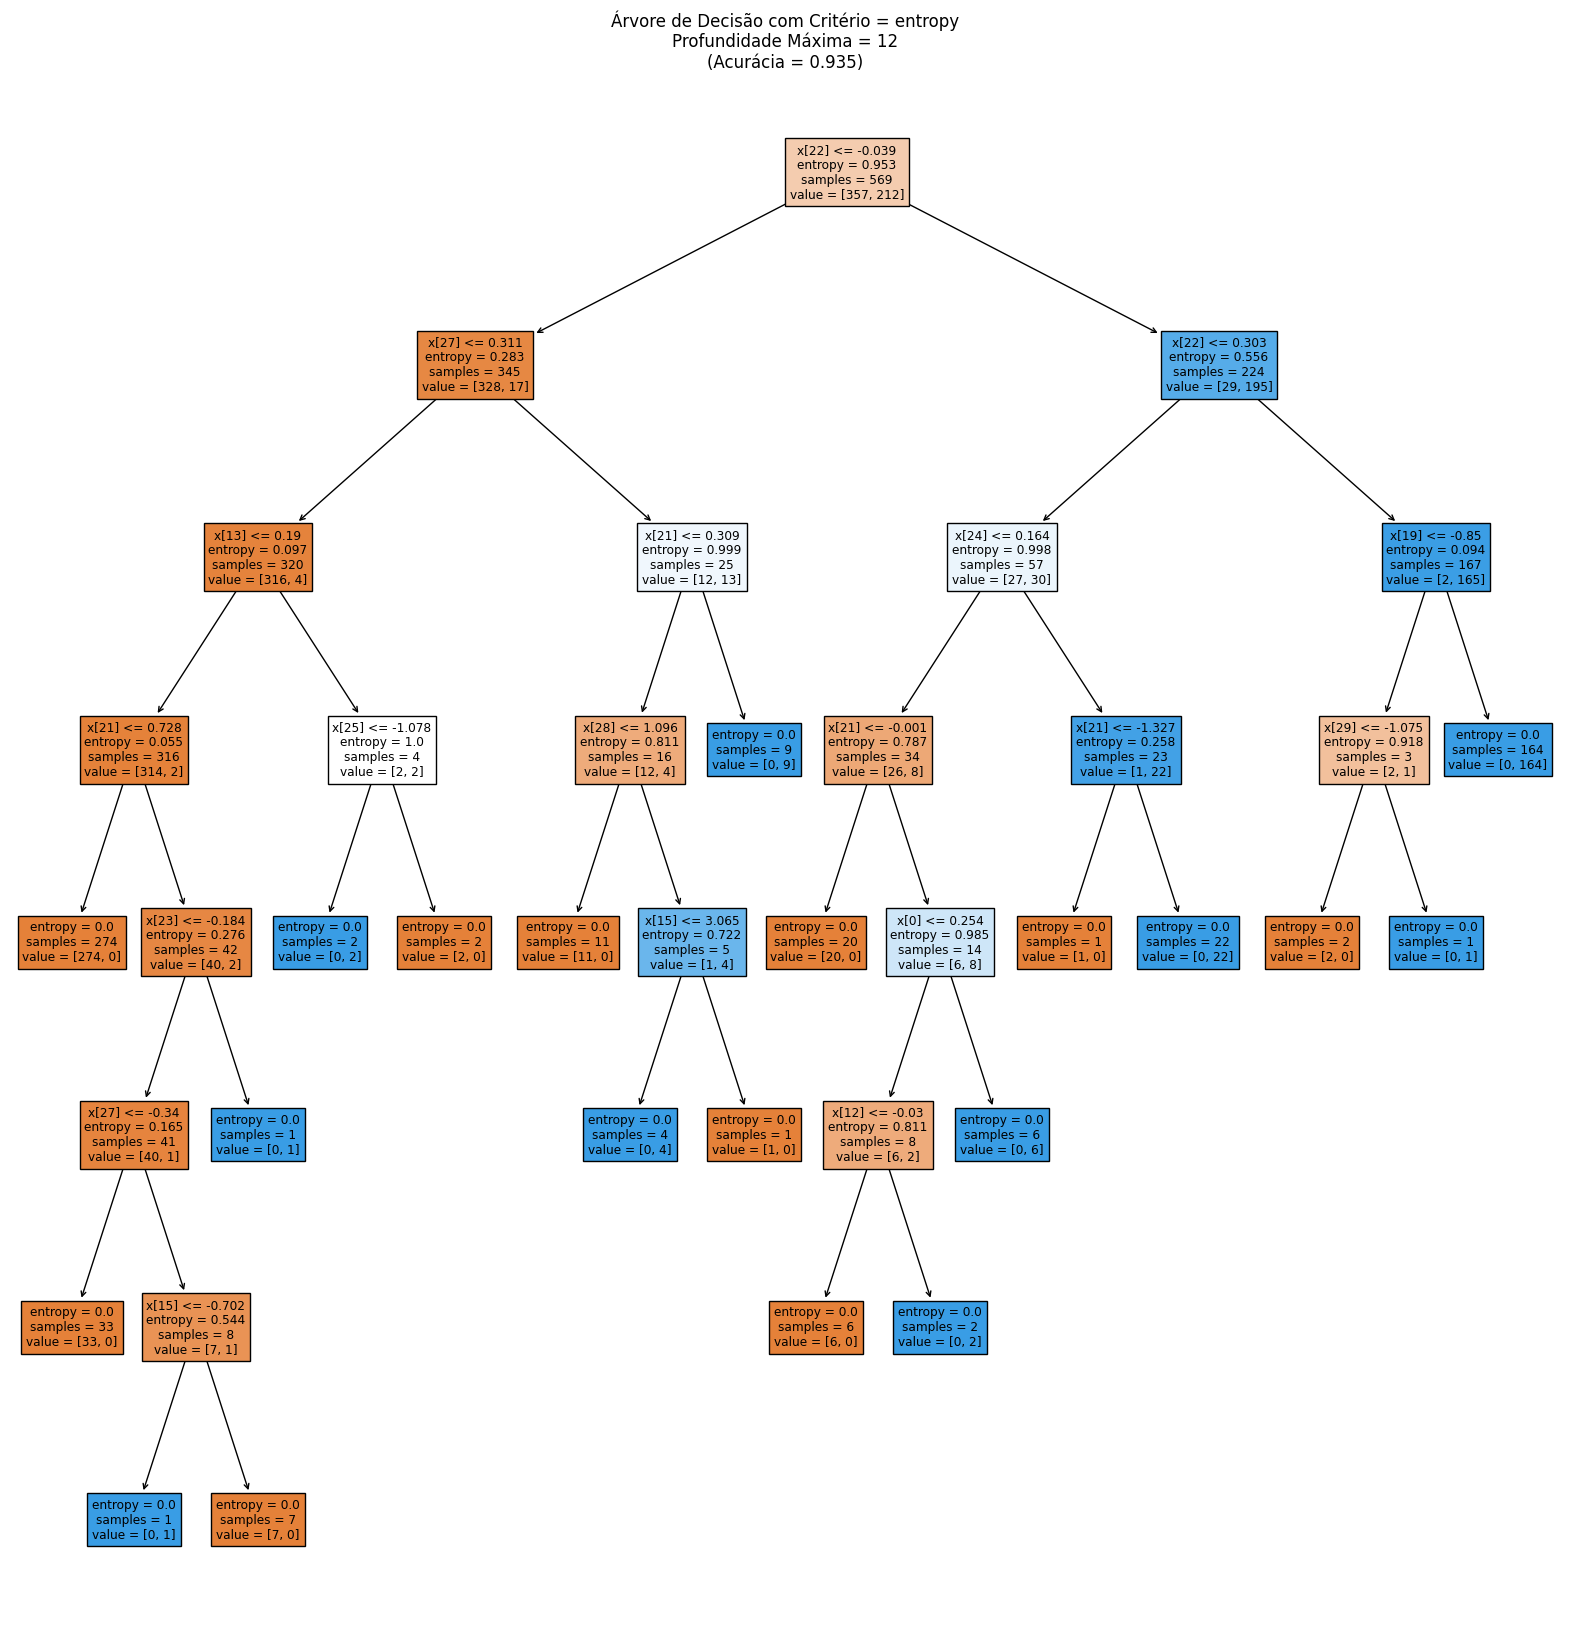

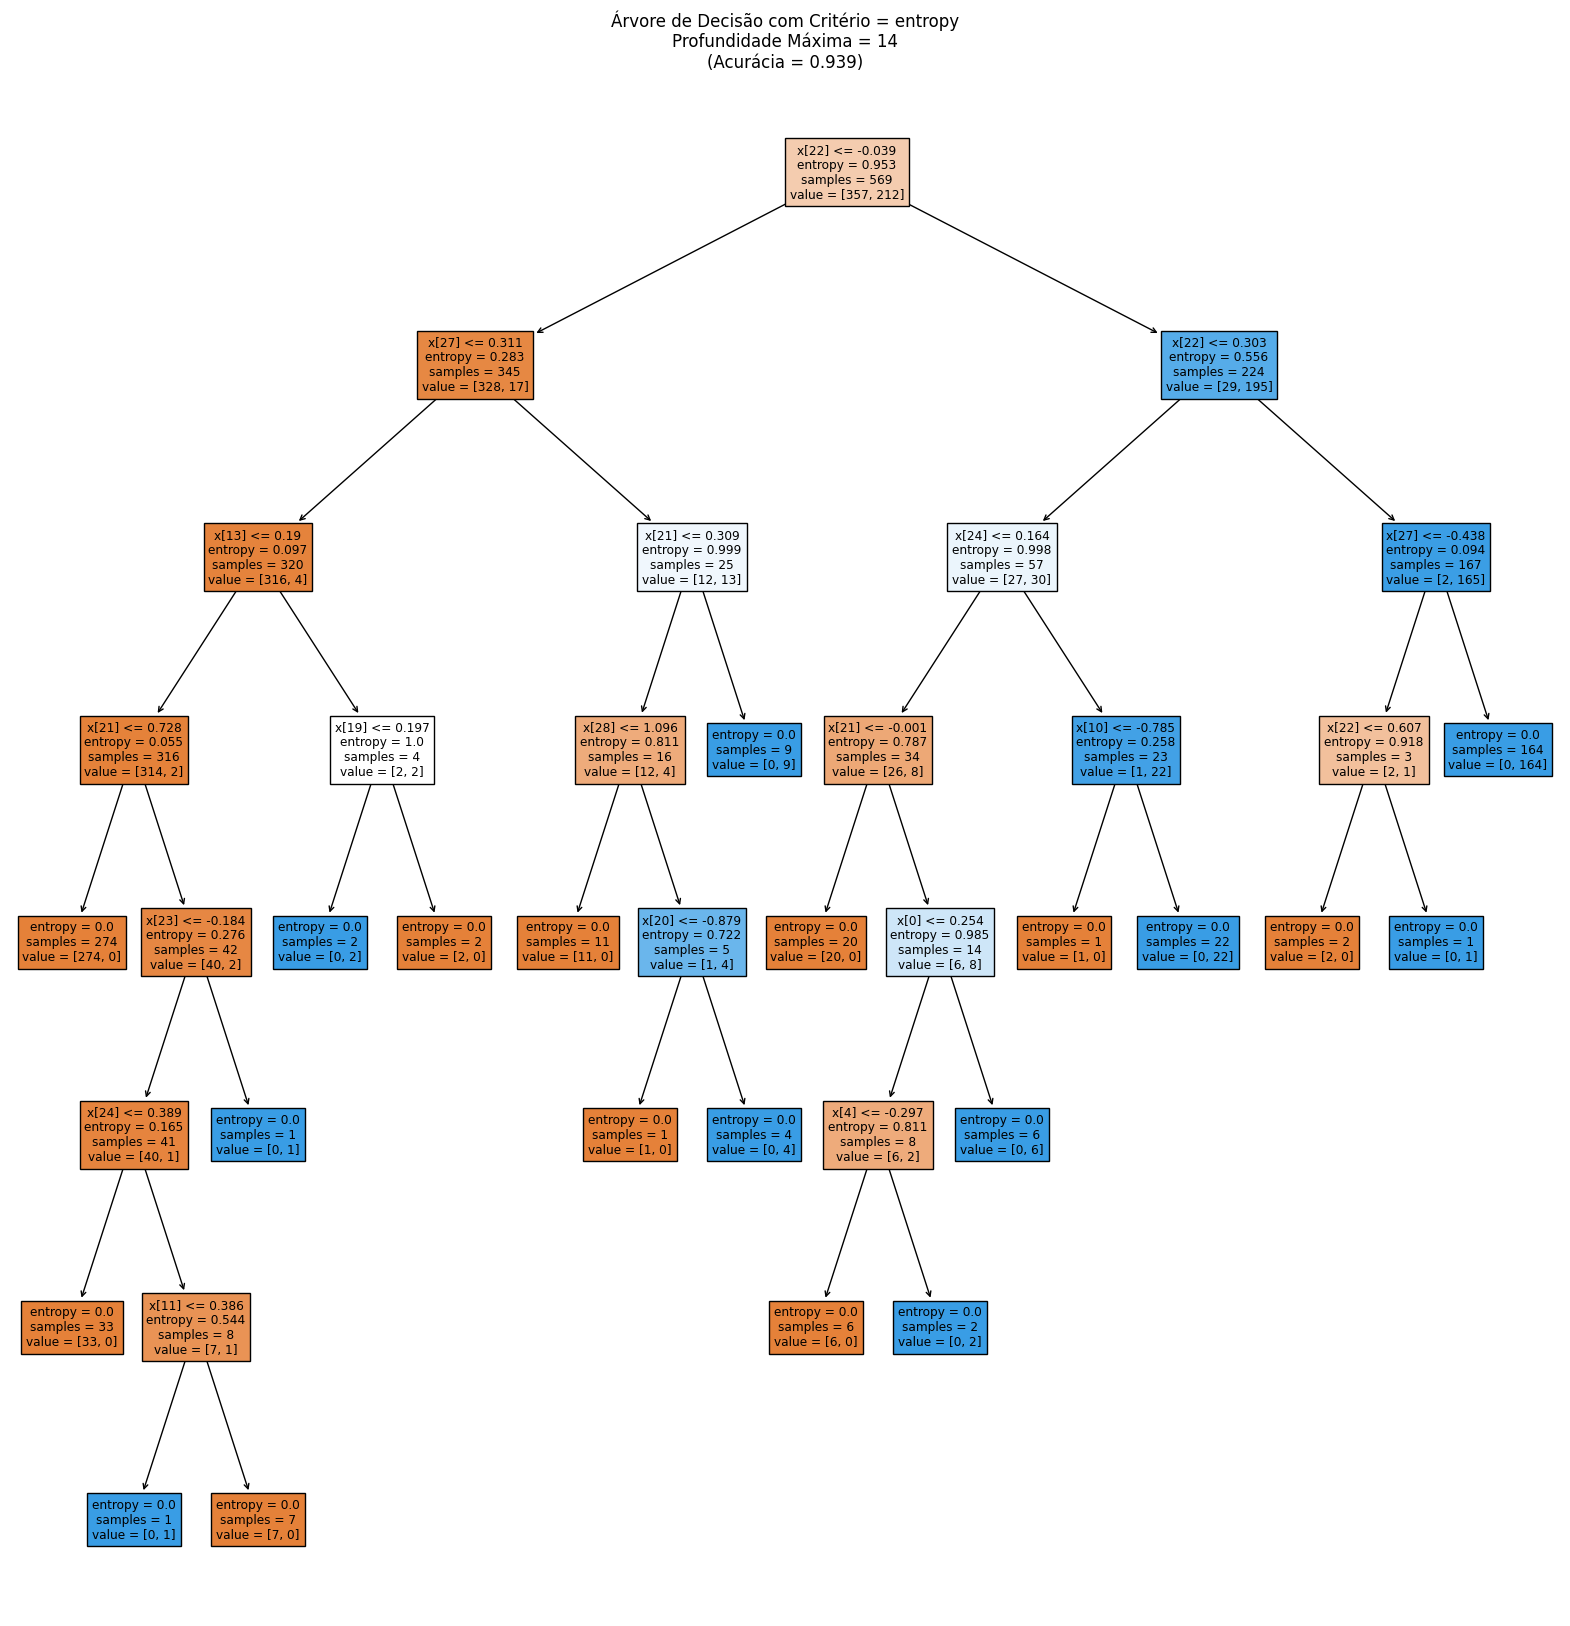

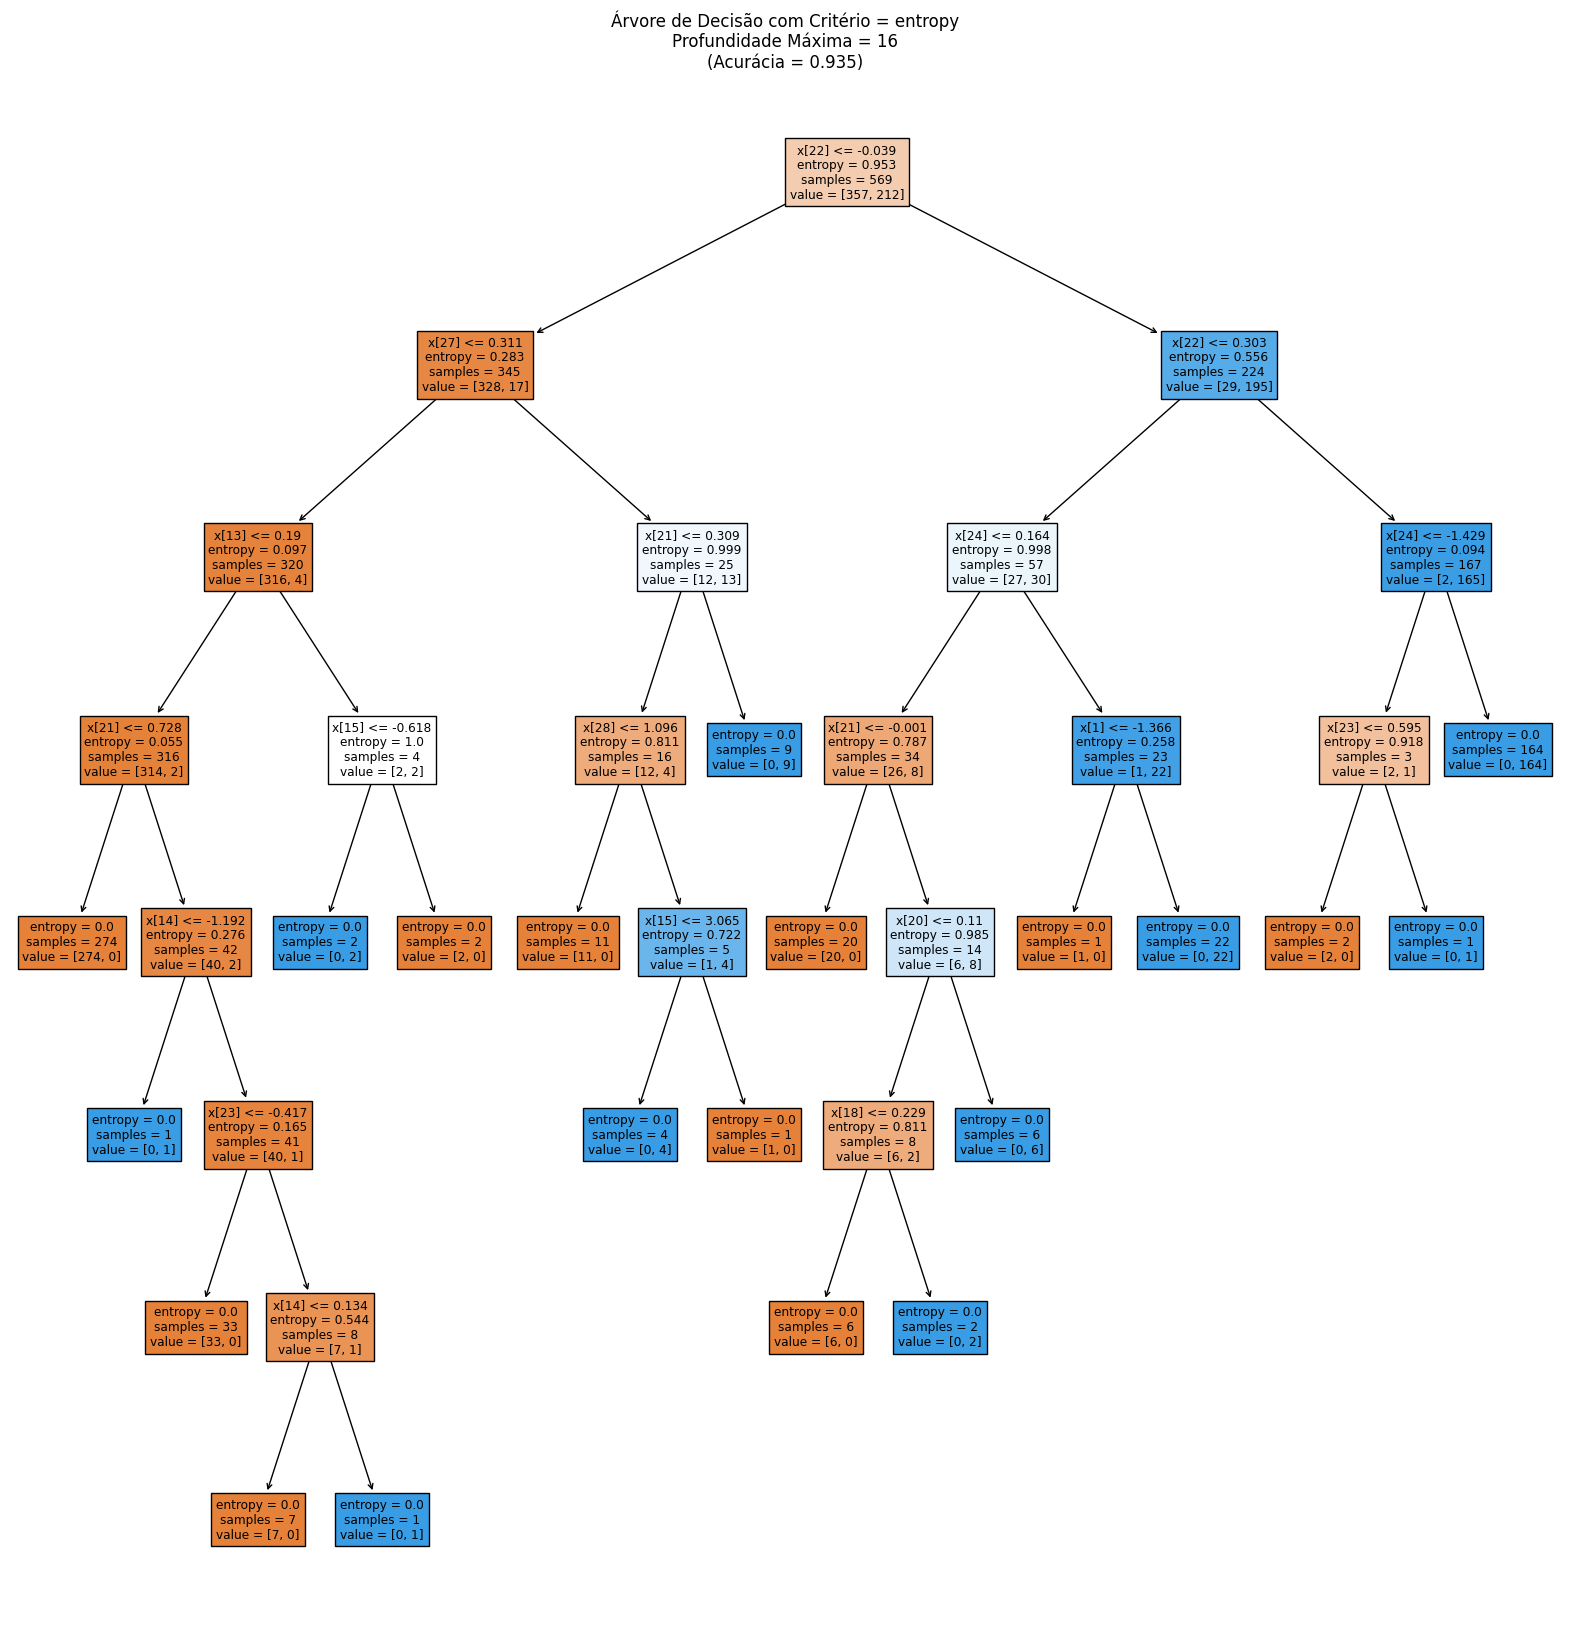

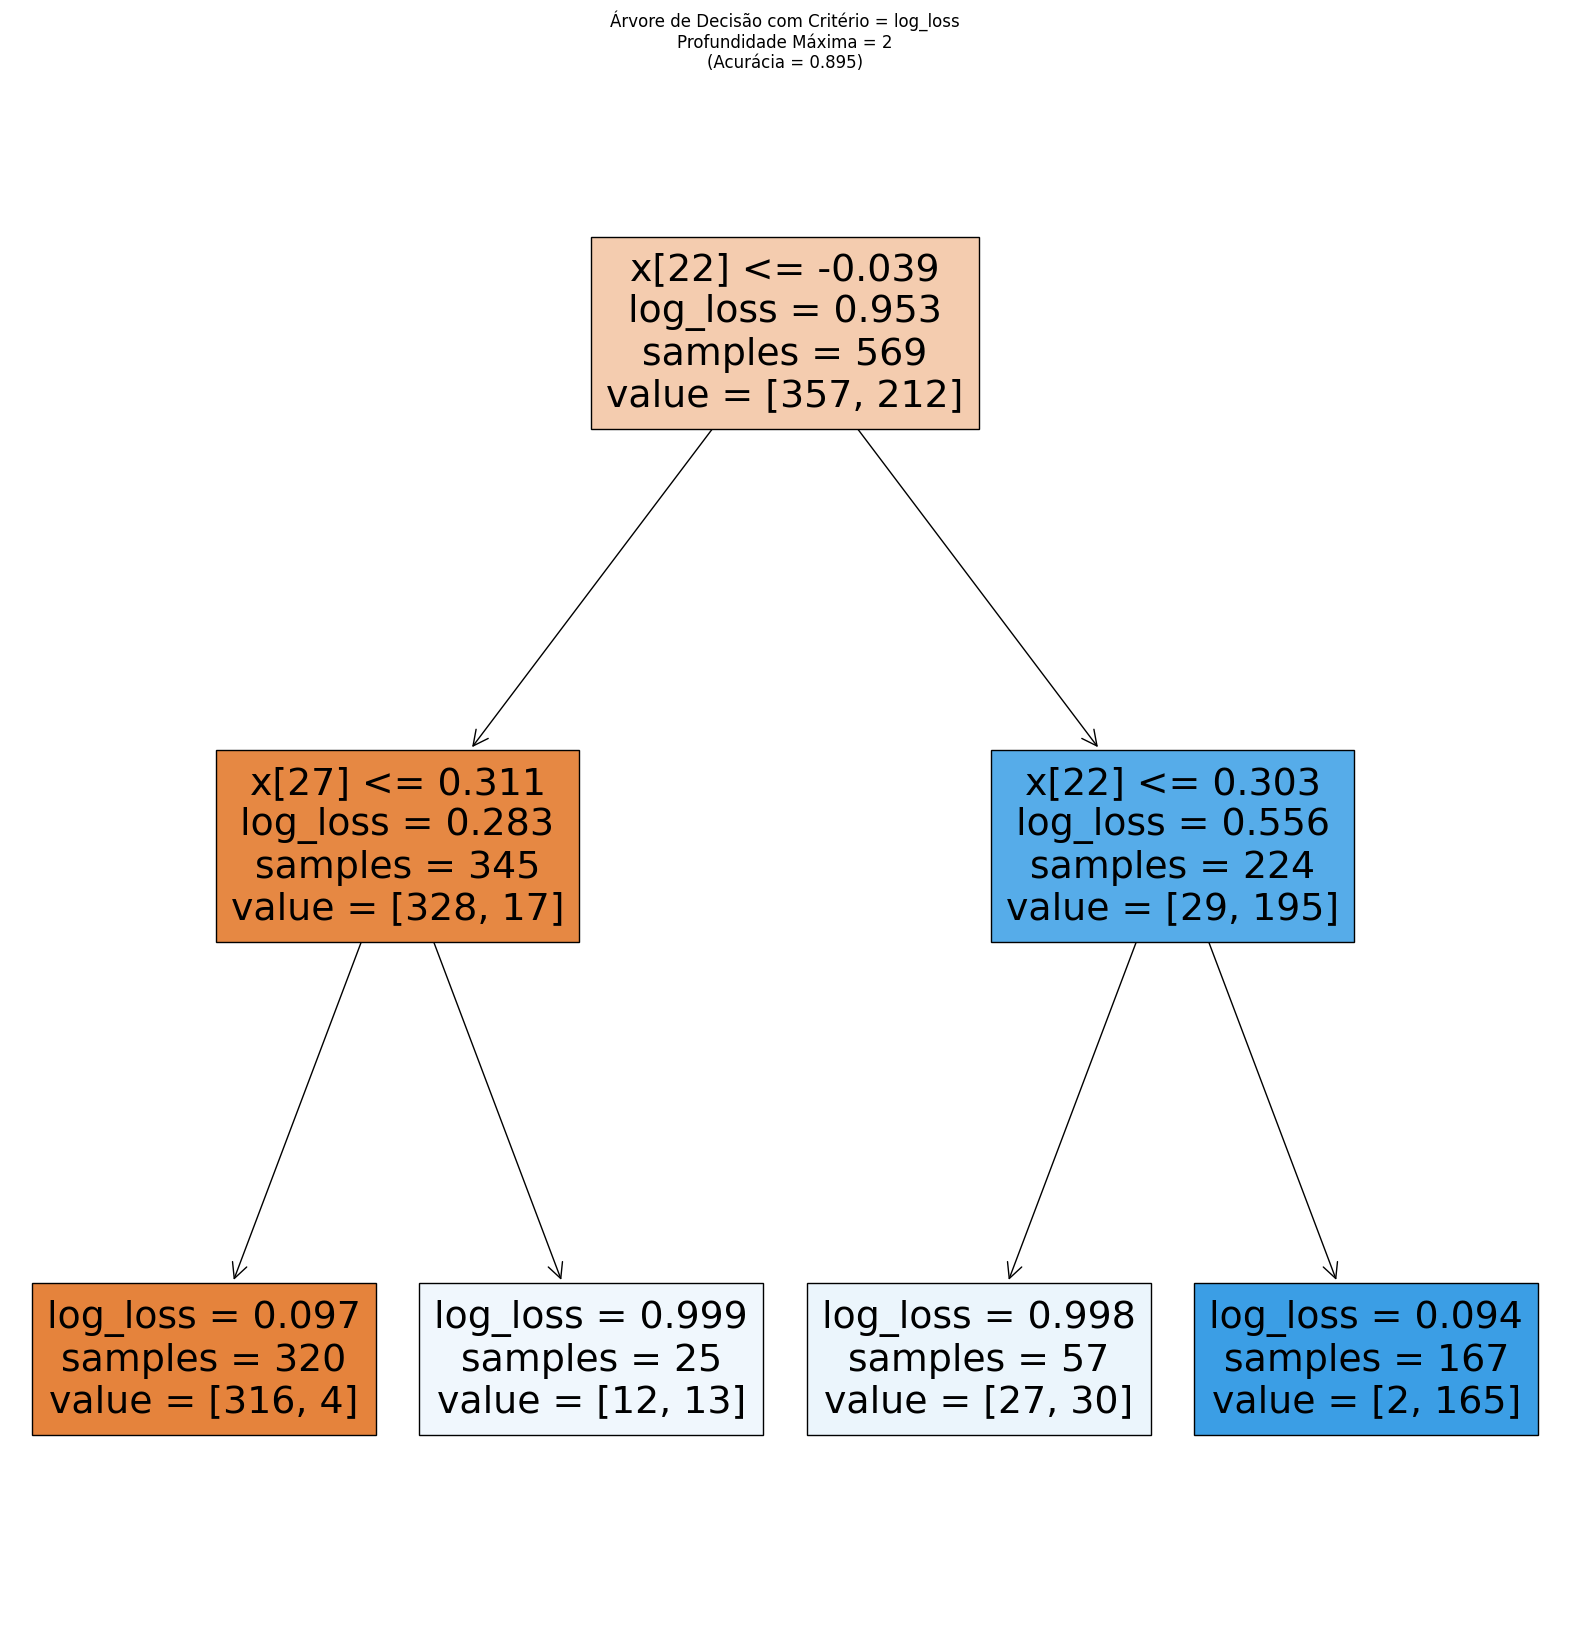

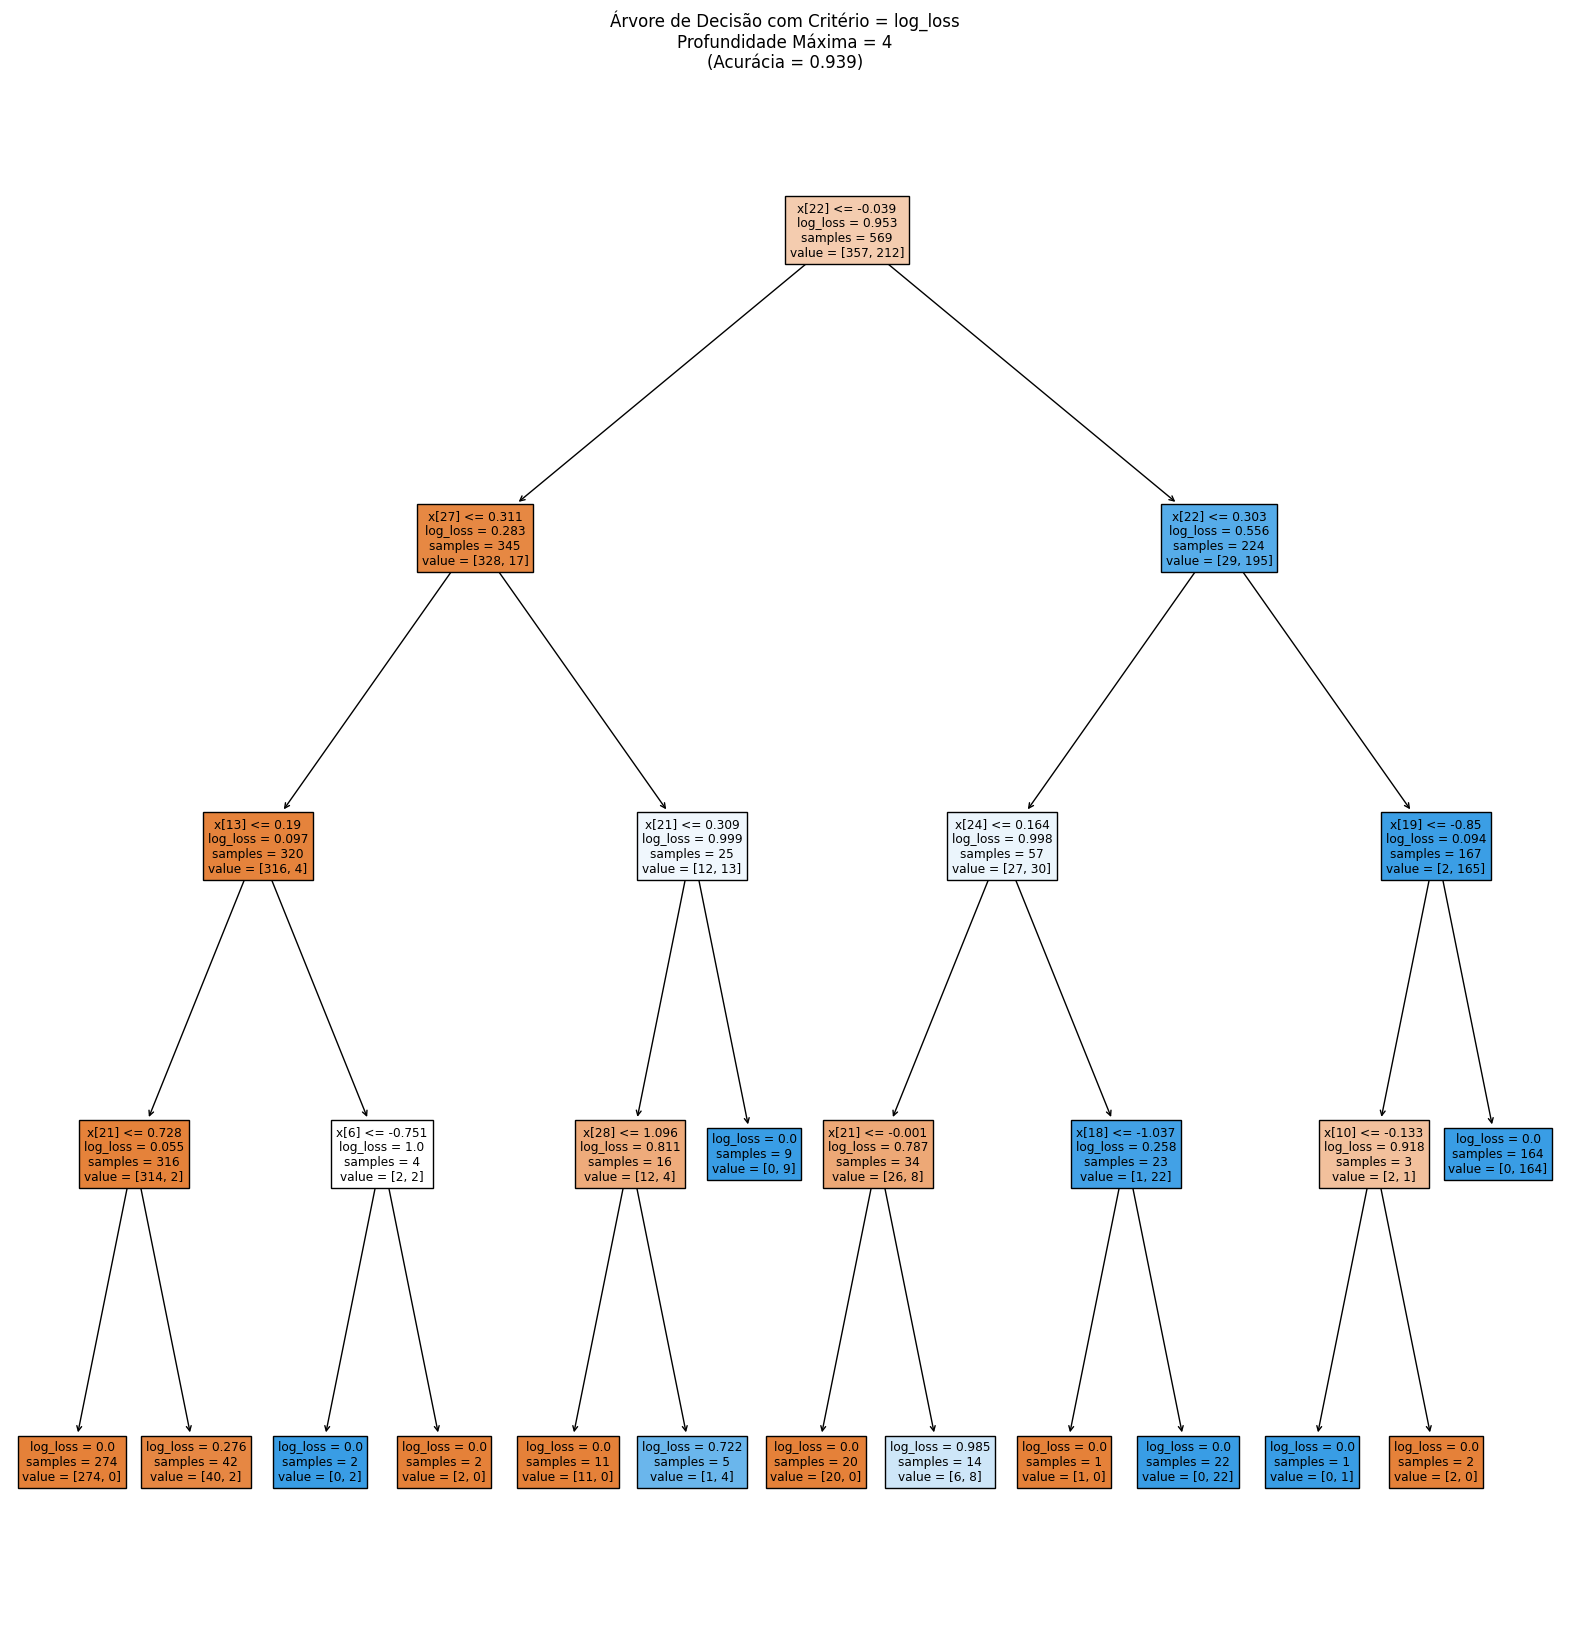

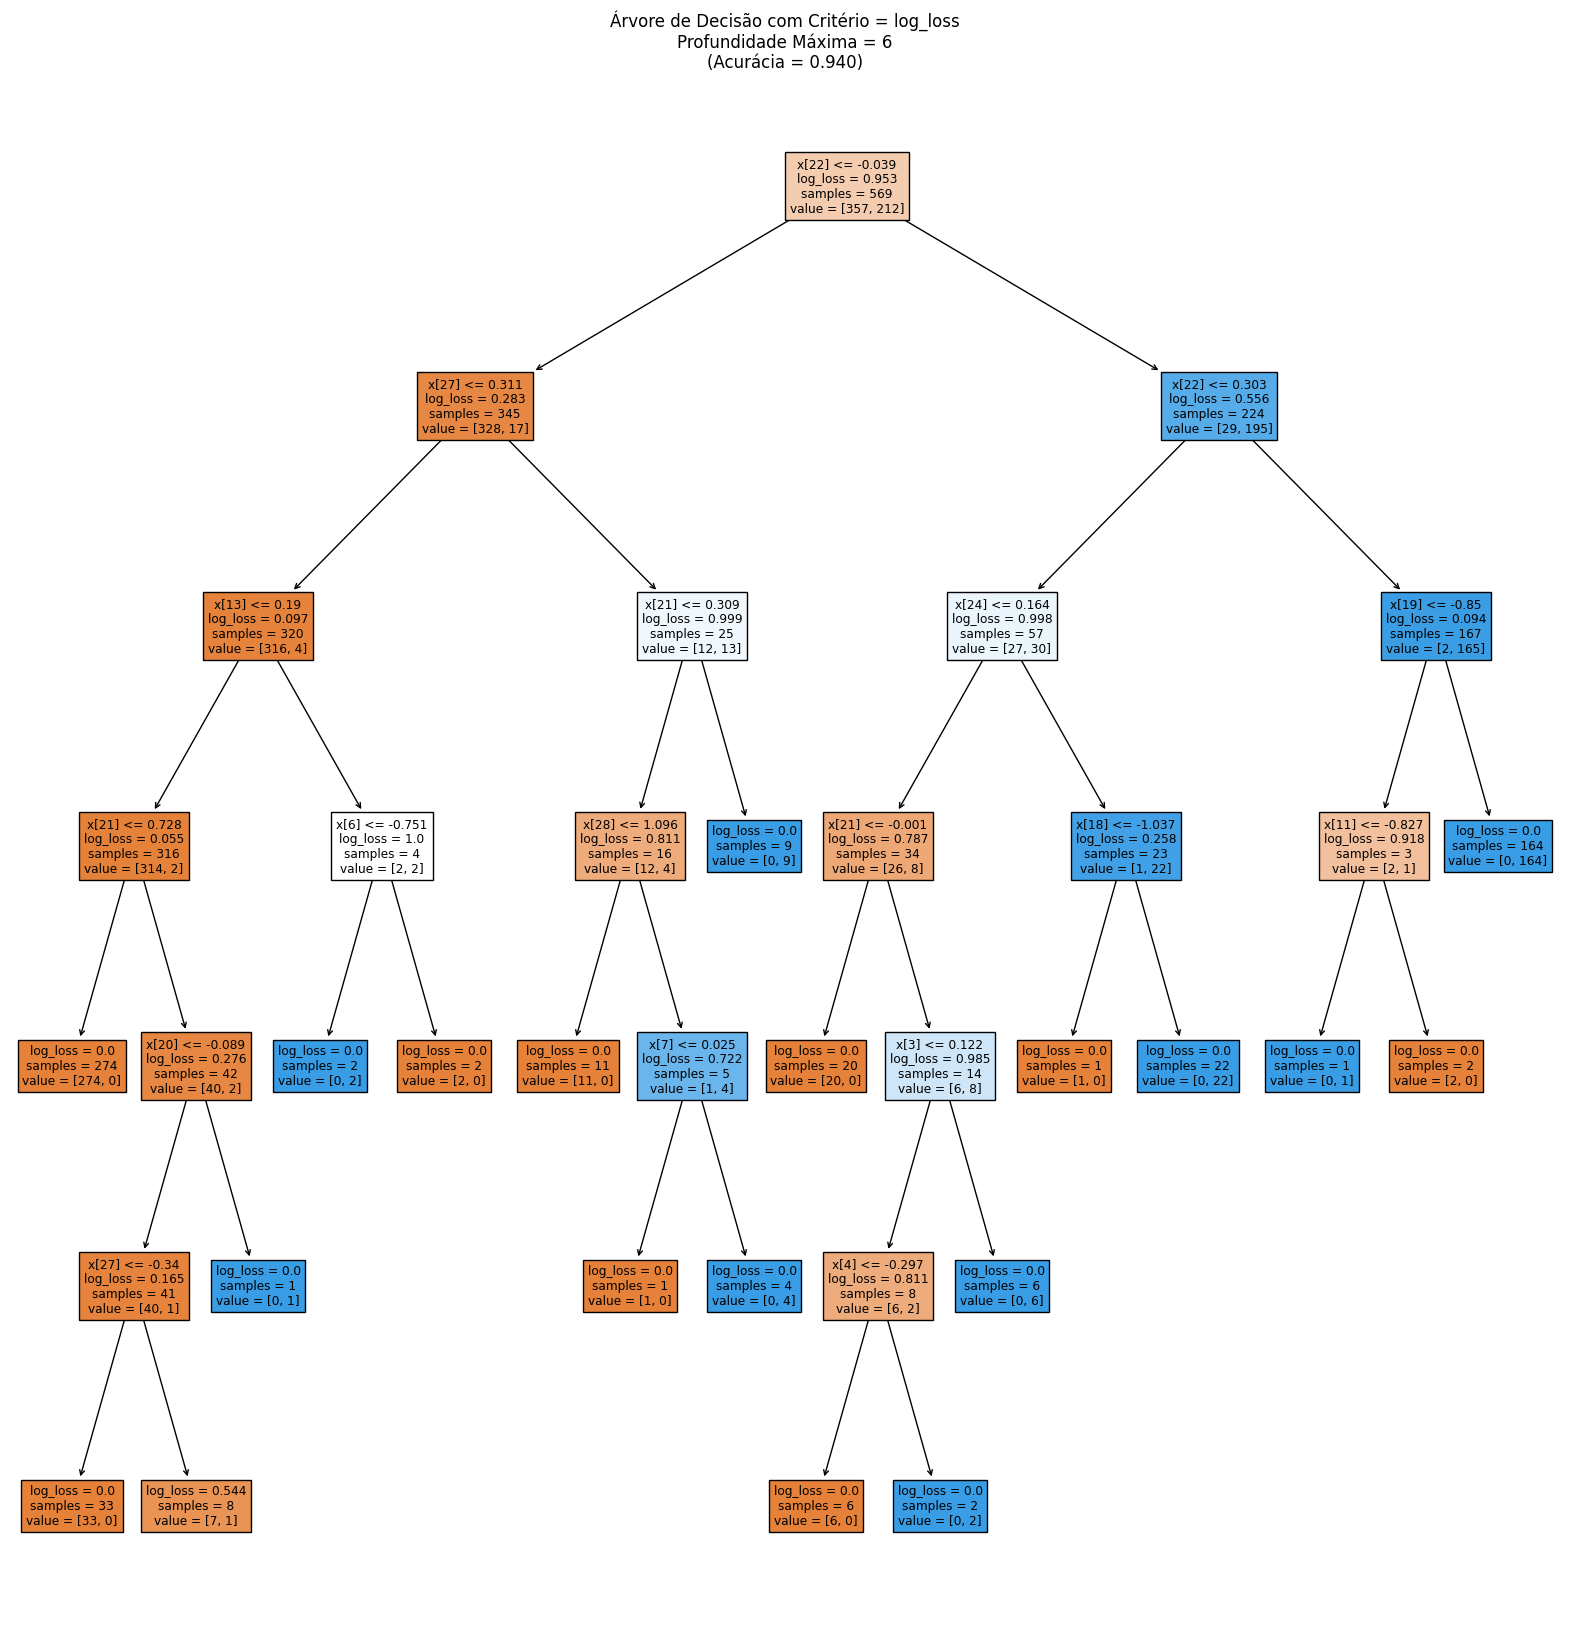

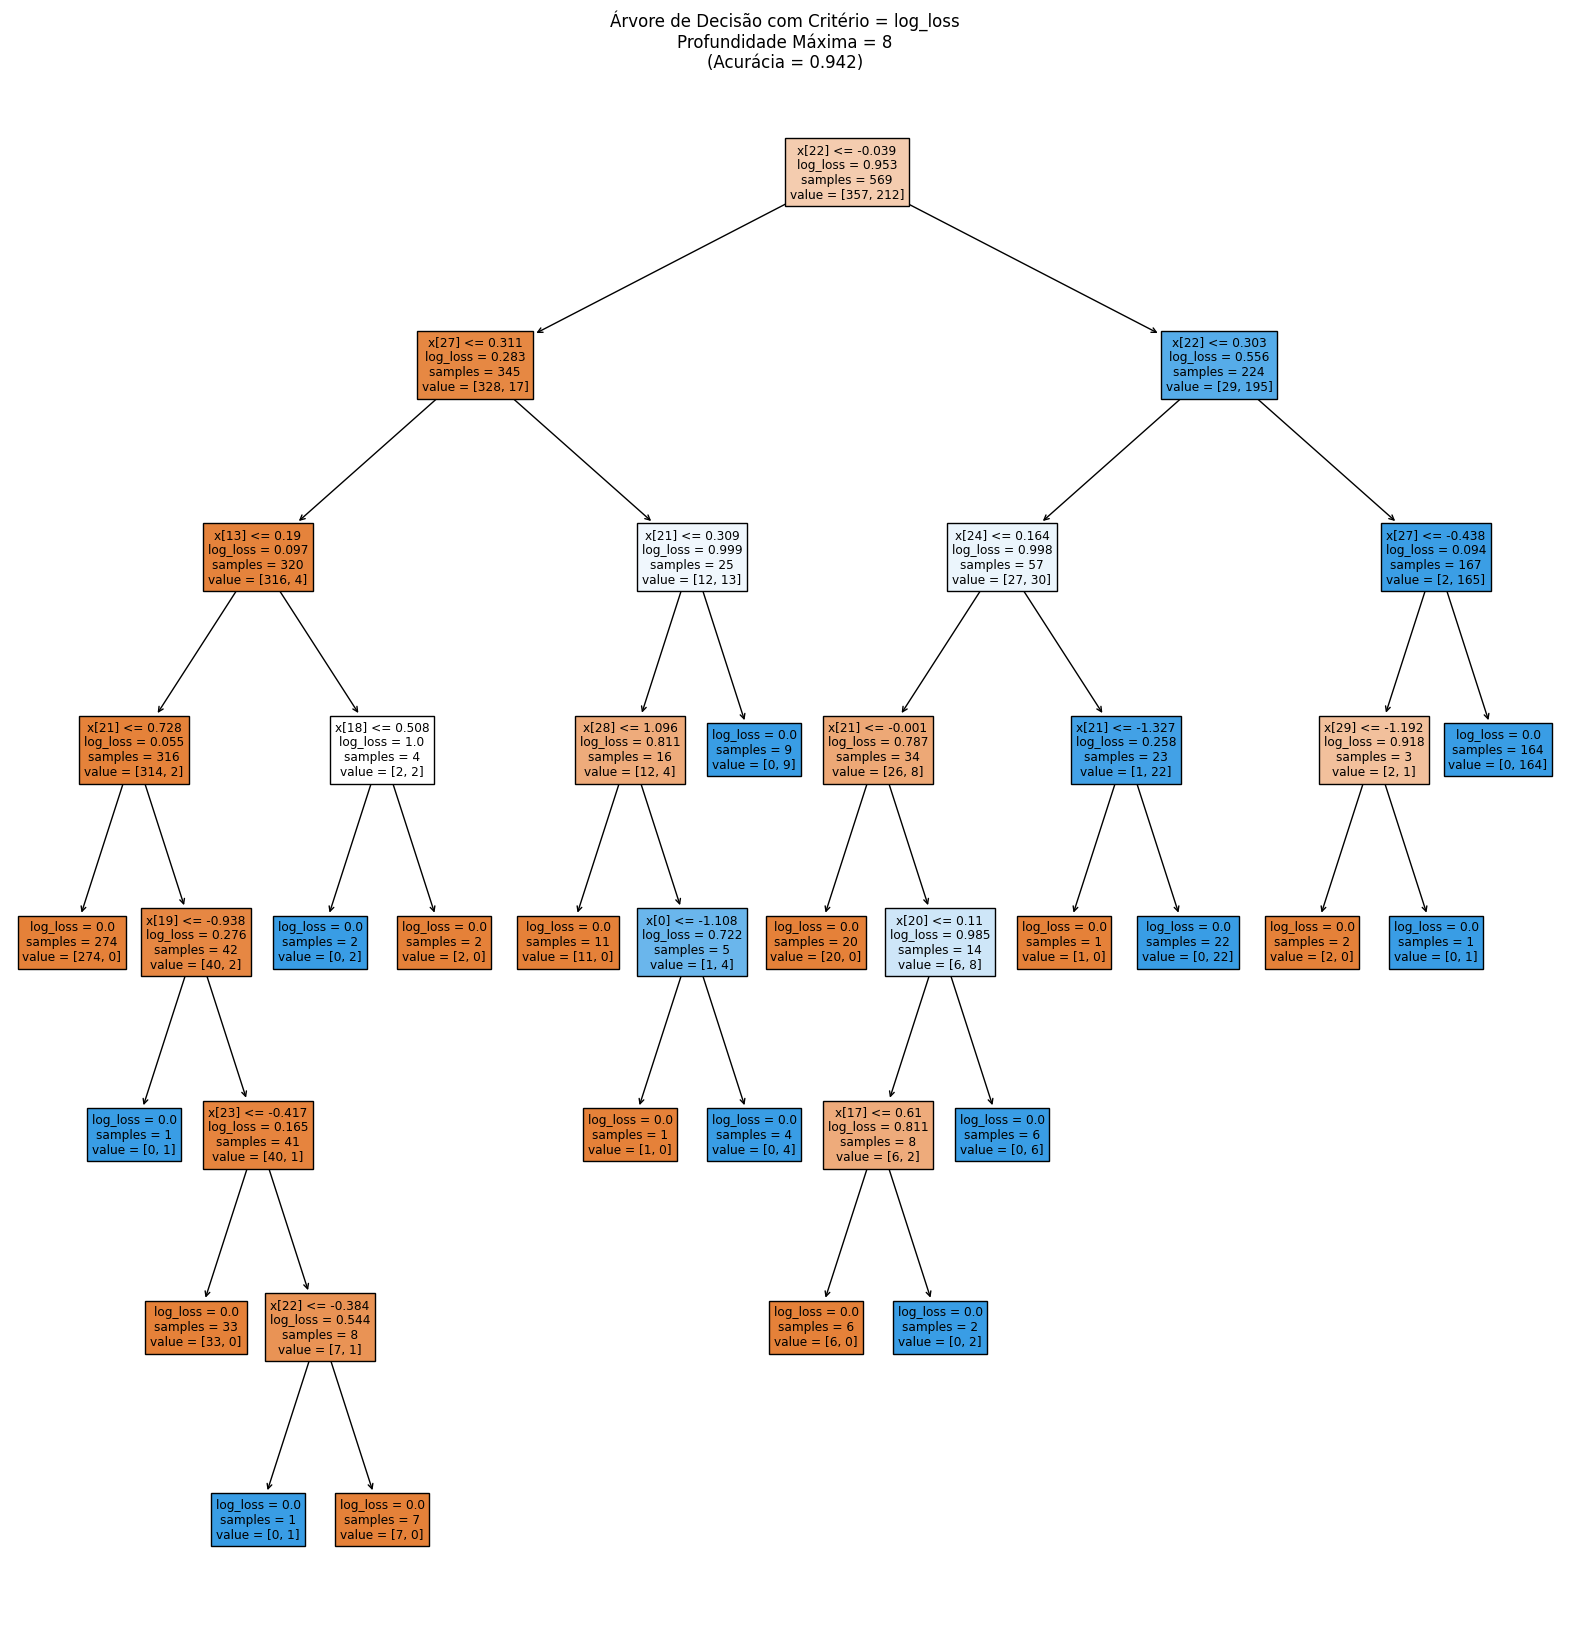

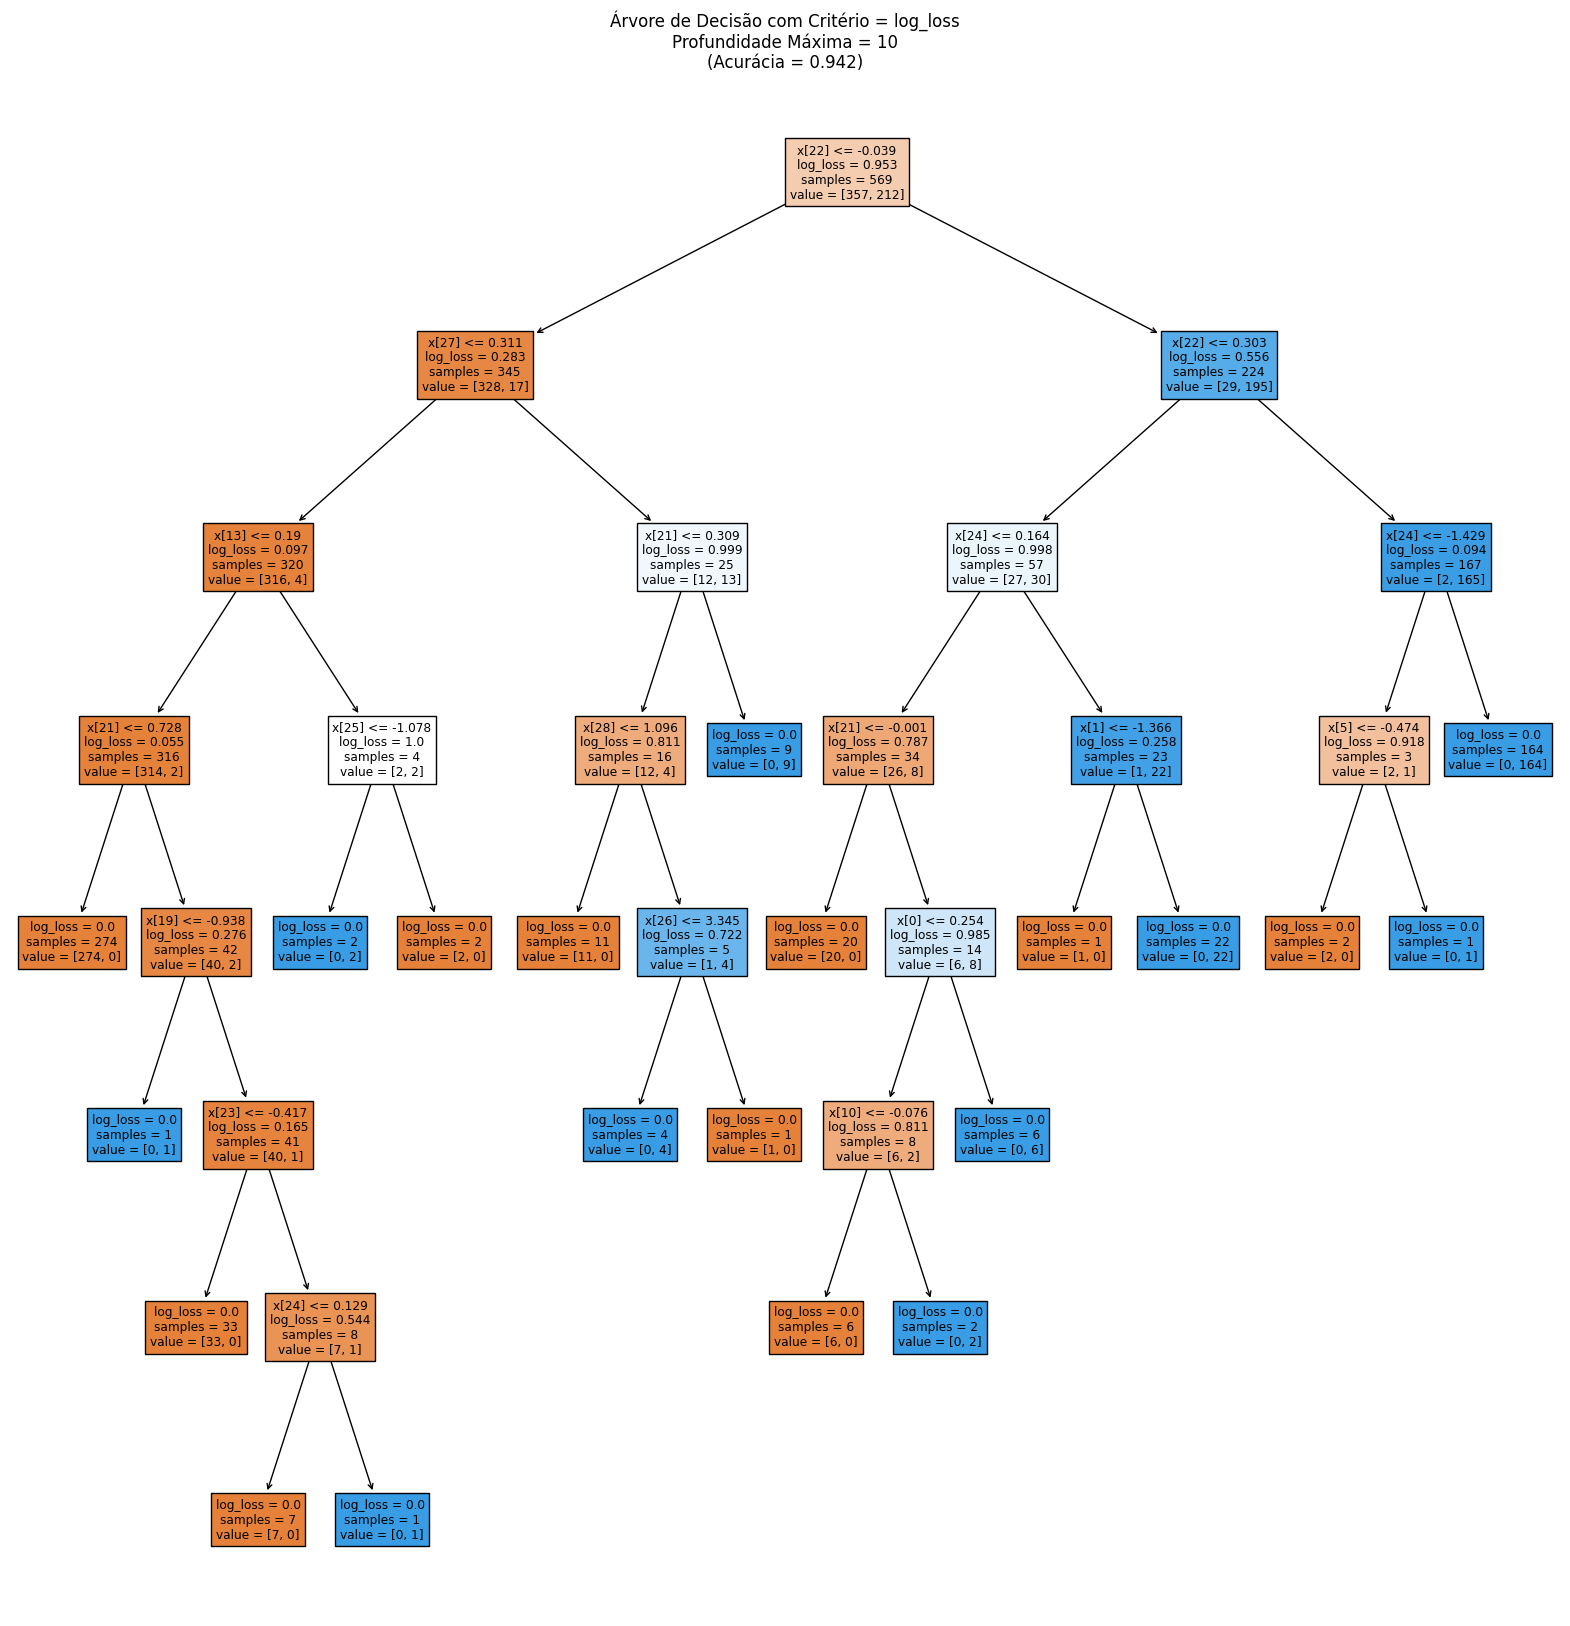

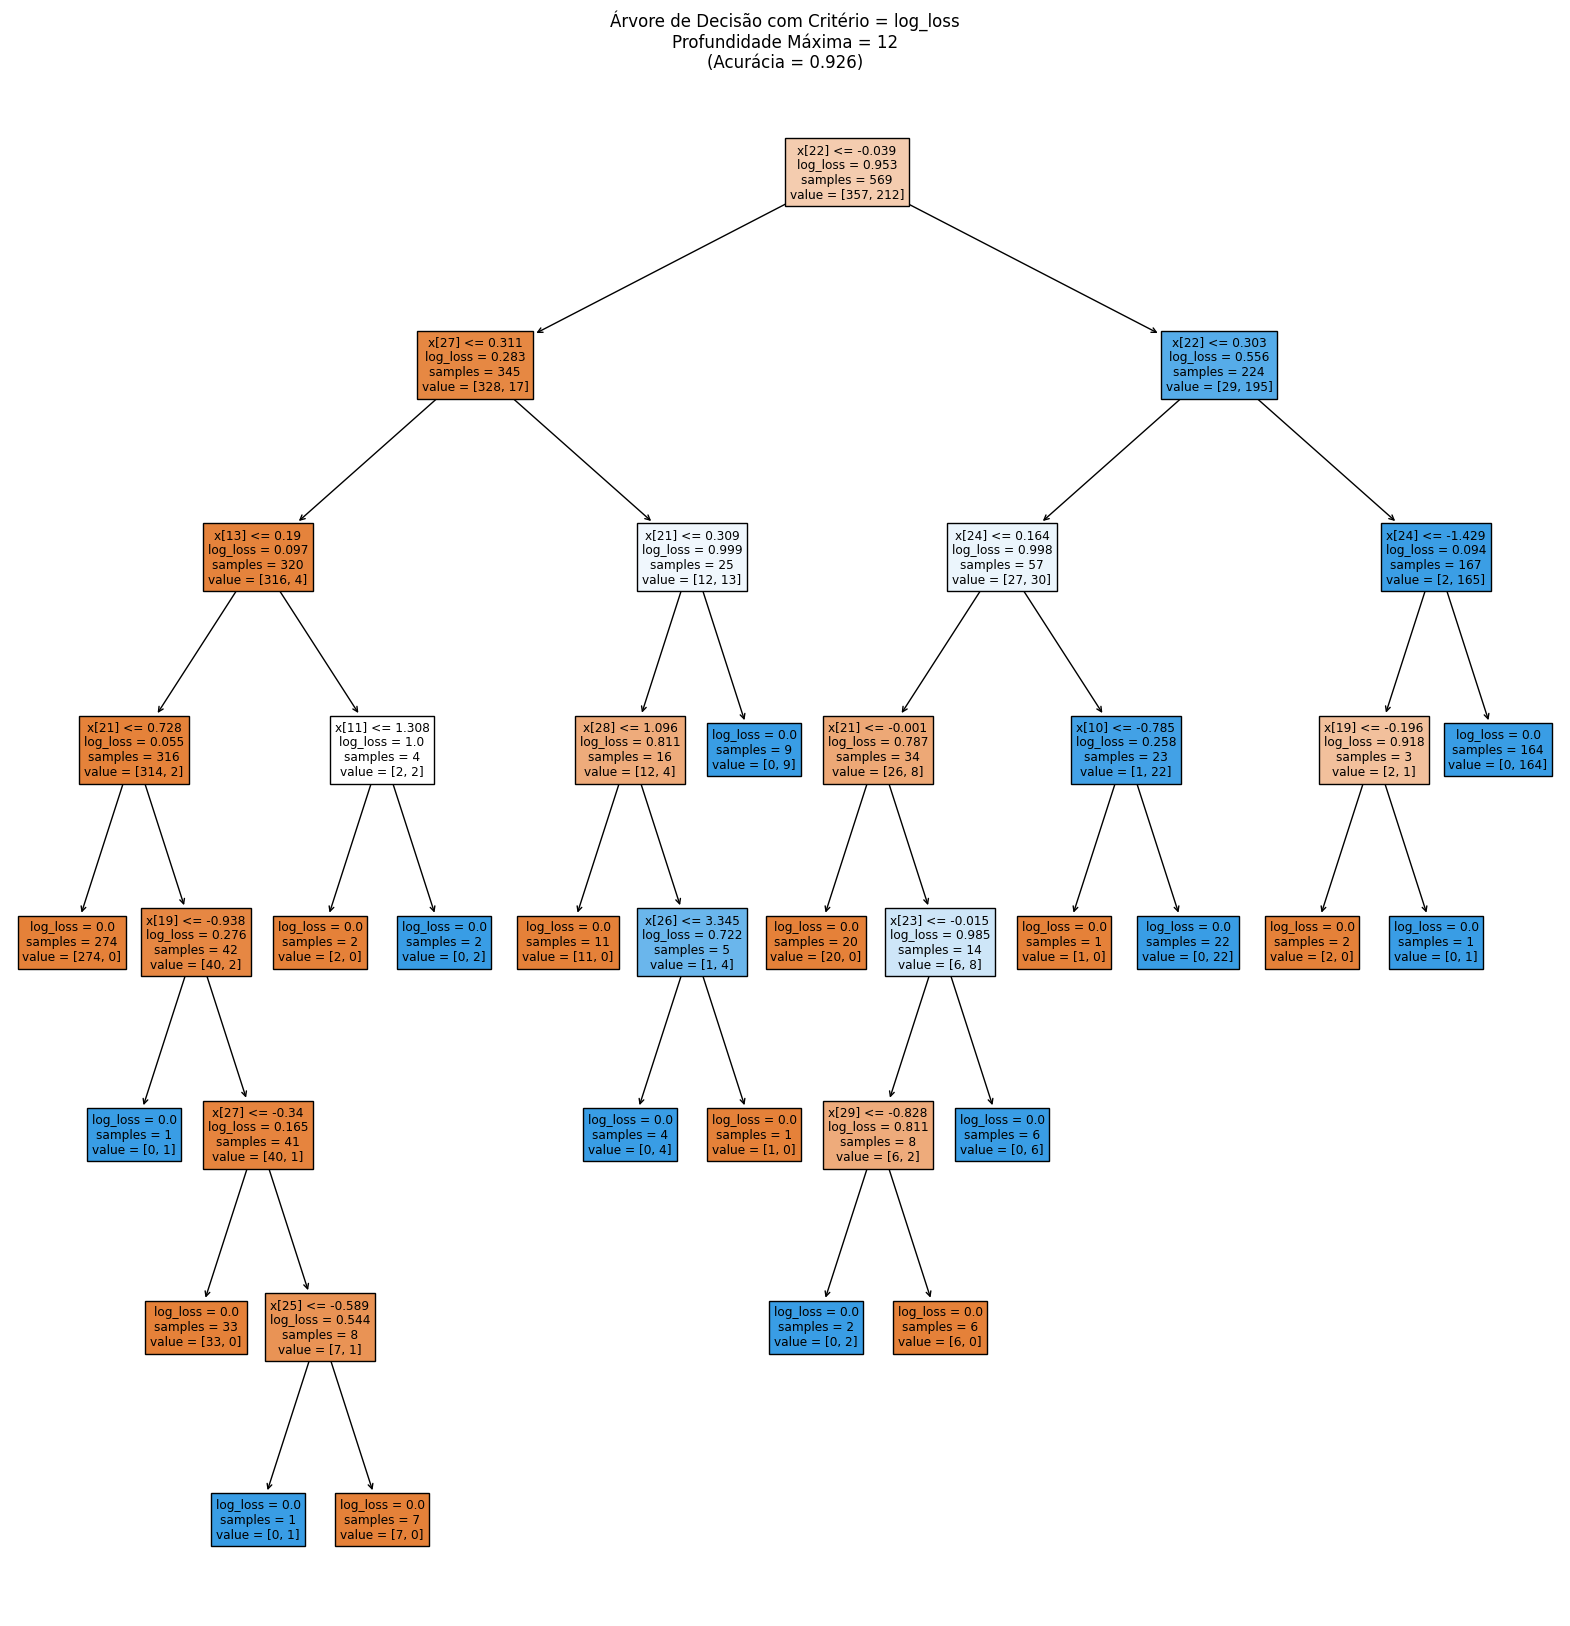

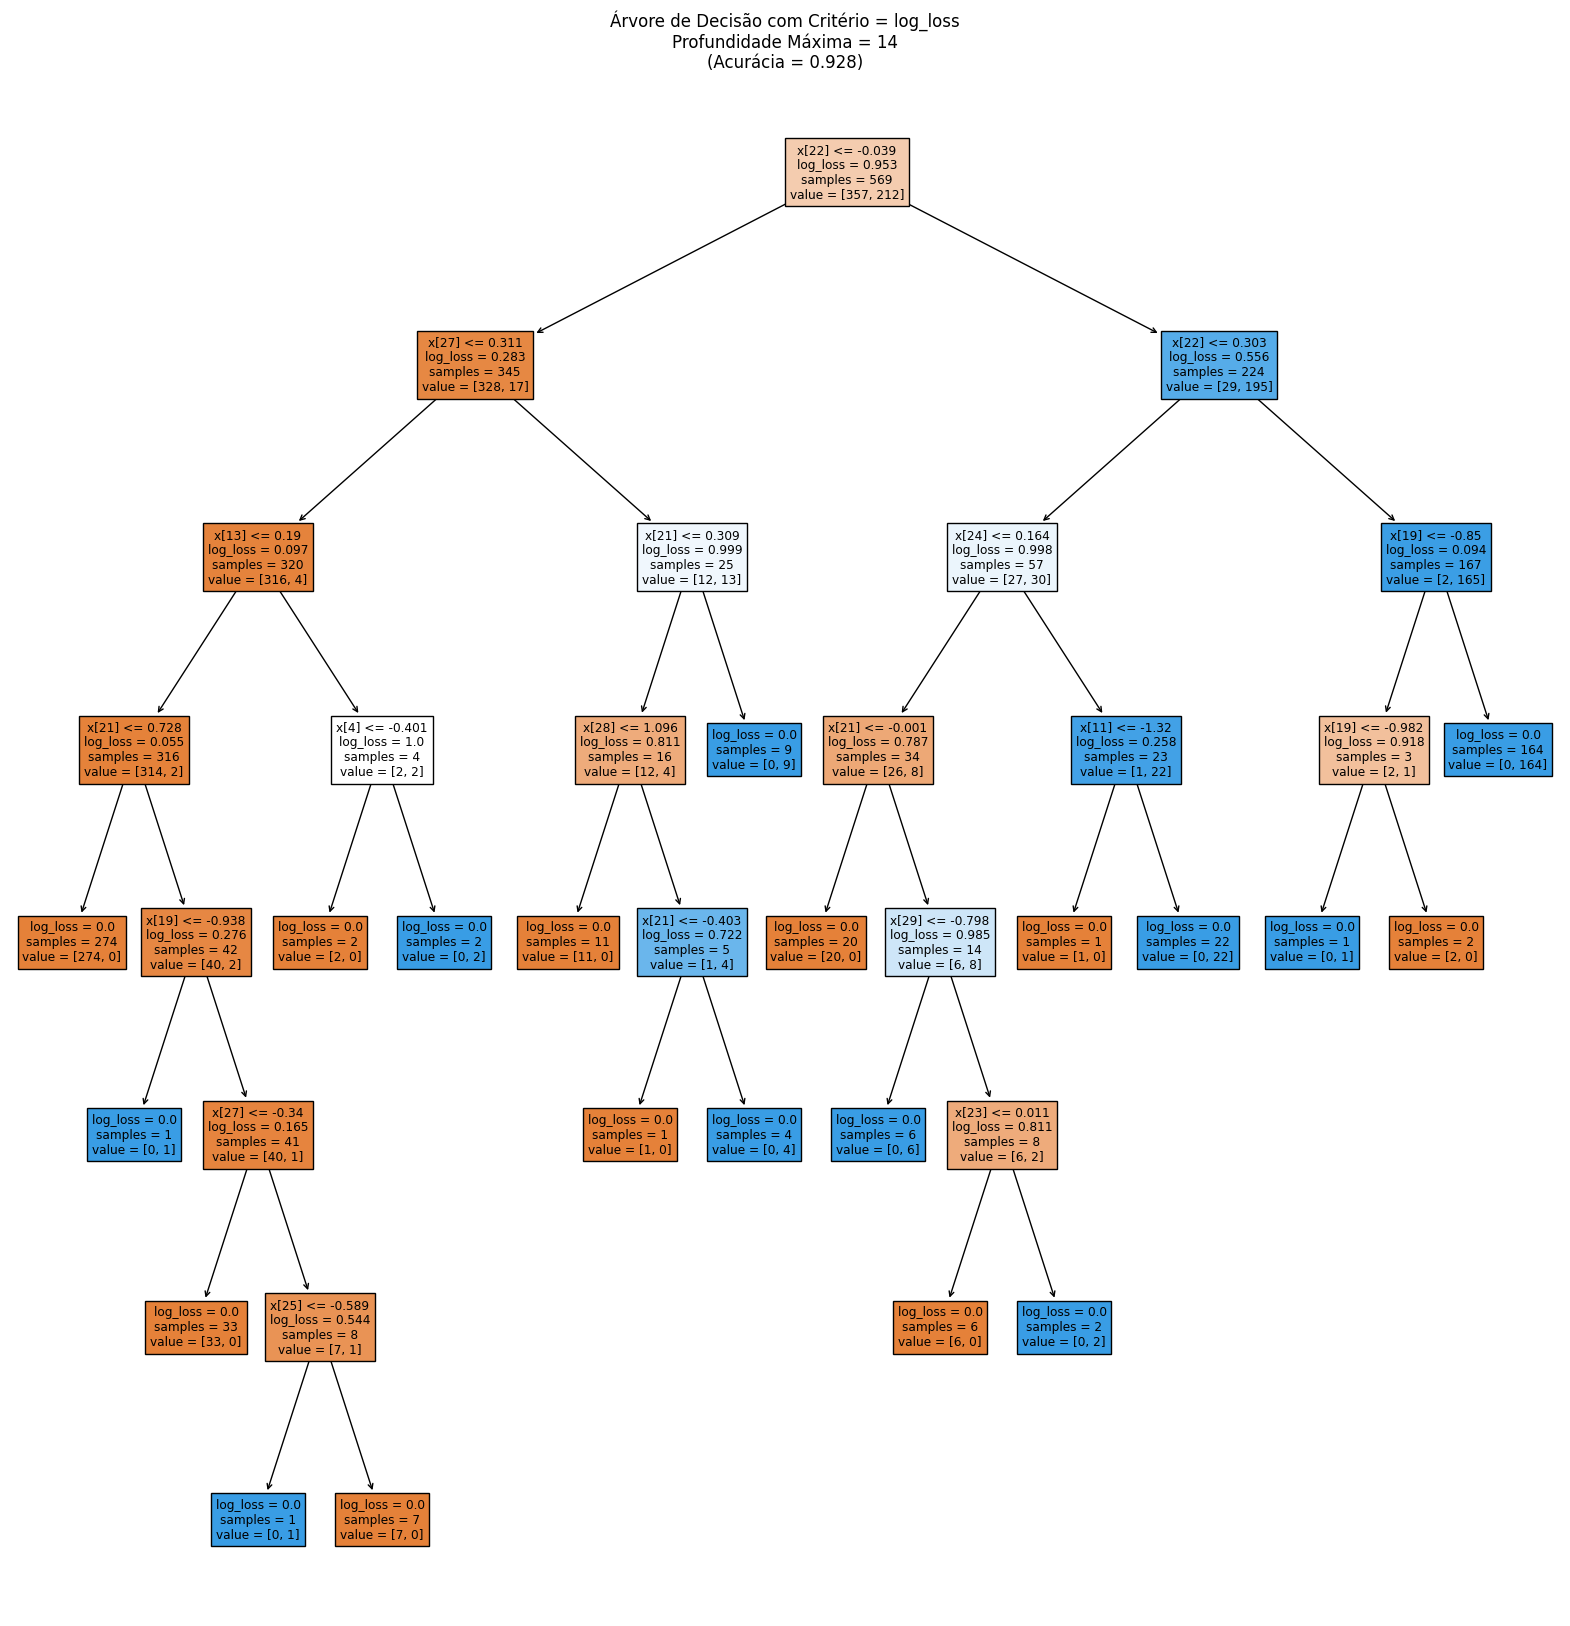

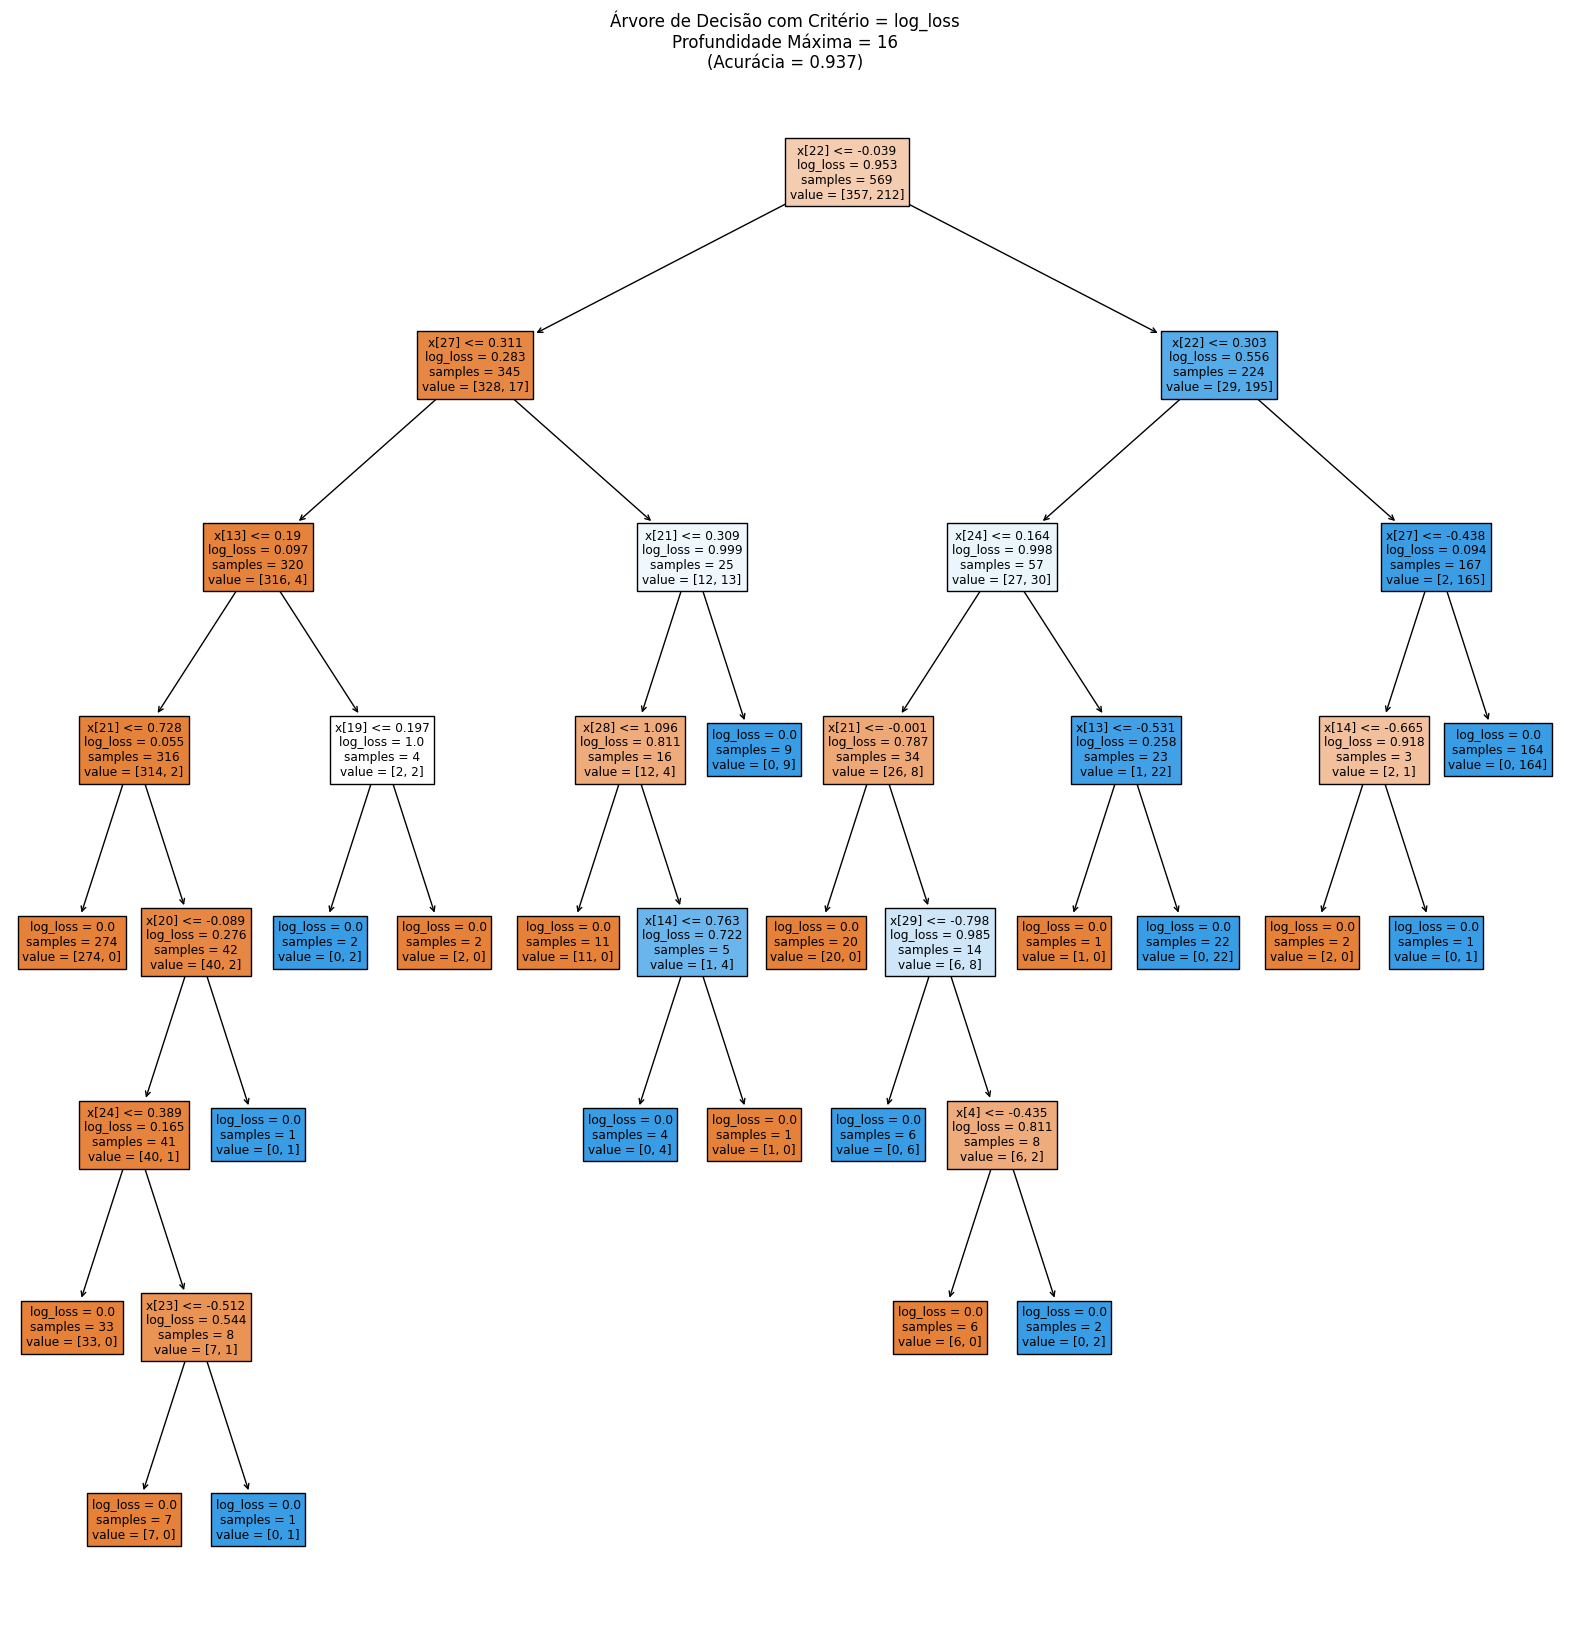

In [19]:
criterion_list = ["gini", "entropy", "log_loss"]
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]

best_configuration = {
    'max_depth': '',
    'accuracy': 0,
    'criterion': ''
}

for criterion in criterion_list:
    for param in max_depth_values:
        #Criando e treinando o modelo de árvore de decisão com os parâmetros atuais
        dt = DecisionTreeClassifier(criterion=criterion, max_depth=param)
        dt.fit(data, data_labels)

        #Encontrando a acurácia média
        scores = cross_val_score(dt, data, data_labels, cv=10)
        mean_score = np.mean(scores)

        #Plotando o gráfico
        plt.figure(figsize=(20,20))
        plot_tree(dt, filled=True)
        plt.title(f"Árvore de Decisão com Critério = {criterion}\nProfundidade Máxima = {param}\n(Acurácia = {mean_score:.3f})")
        plt.show()

        #Verificando se a acurácia atual é maior do que a acurácia máxima encontrada até o momento
        if mean_score > best_configuration['accuracy']:
            best_configuration['criterion'] = criterion
            best_configuration['max_depth'] = param
            best_configuration['accuracy'] = mean_score


#Resultado final de cada métrica com o maior valor de acurácia média

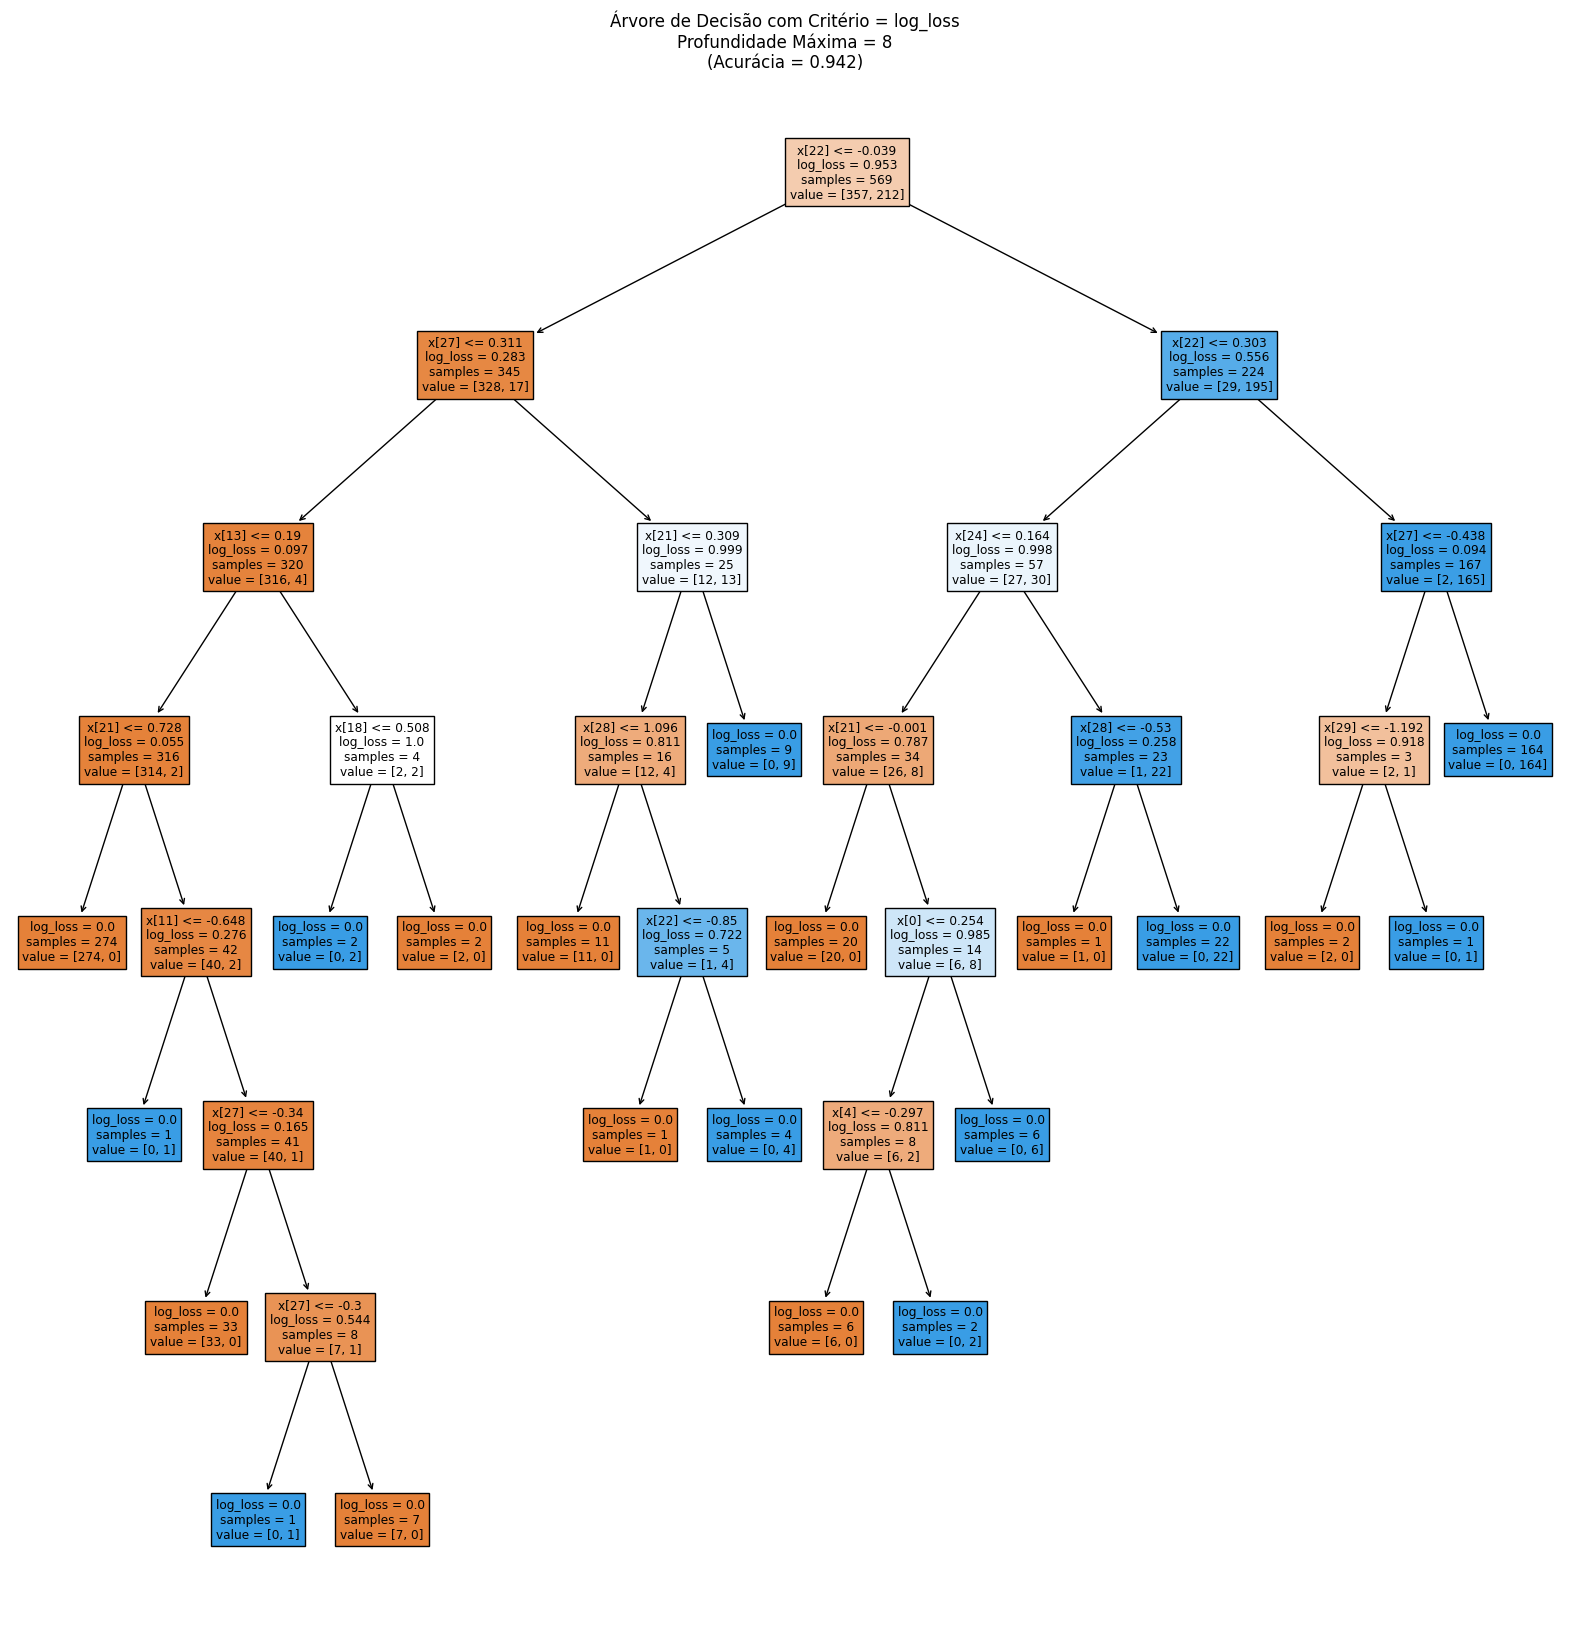

In [20]:
dt = DecisionTreeClassifier(criterion=best_configuration['criterion'], max_depth=best_configuration['max_depth'])
dt.fit(data, data_labels)

plt.figure(figsize=(20,20))
plot_tree(dt, filled=True)
plt.title(f"Árvore de Decisão com Critério = {best_configuration['criterion']}\nProfundidade Máxima = {best_configuration['max_depth']}\n(Acurácia = {best_configuration['accuracy']:.3f})")
plt.show()